## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

So interpretation is important!

The steps we will follow in this exercise are as follows-

- Data Reading ,Understanding, Cleaning , Visualization
- Data preparation ( Converting categorical data into numerical data, creation of dummy variables)
- Data Pre-processing( Feature selection)
- Train-Test split , Scaling
- Model Building and Evaluation (Linear Regression, Ridge and Lasso Regression)
- Residual Analysis of Linear Regression.
- Observations

## Step1: Reading , Understanding , Cleaning and Visualizing the data

## Data Reading and Understanding

In [13796]:
#Importing the Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


import os

# Suppress warnings

import warnings
warnings.filterwarnings('ignore')


In [13797]:
#To expand the output display to see more rows
pd.options.display.max_rows = None

#To expand the output display to see more columns
pd.options.display.max_columns = None

In [13798]:
#read the dataset
house_data = pd.read_csv('train.csv')
house_data.head()  

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

here , SalePrice as target variable

In [13799]:
#Checking the no. of rows and columns
house_data.shape 

(1460, 81)

In [13800]:
#summary of  a DataFrame 'house_data'
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

So there are missing values. Imputation of missing values are required.

In [13801]:
#Statistical summary of a DataFrame 'house_data'
house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column

#### Missing value treatment

In [13802]:
#Check the number of null values in the columns
round(100*(house_data.isnull().sum()/len(house_data.Id)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

Dropping 'Alley','PoolQC','Fence','MiscFeature' because of high percentage of missing values. We are considering it less significant for house price prediction due to less information.

In [13803]:
#Drop columns with more than 85 % of  null values.
house_data = house_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1)

In [13804]:
#Once again check the number of null values in the columns
round(100*(house_data.isnull().sum()/len(house_data.Id)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [13805]:
#Statistical summary of a DataFrame 'house_data'
house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

Also we can observe that min and max of these variables varies so therefore rescaling is required to be done. As these variables are not following proper scale.

Also we can observe , as the difference between 25% and min. & 75% and max is large so we can clearly say that there are outliers for LotFrontage, MasVnrArea,GarageYrBlt.

#### Imputing Continuous col. variable

In [13806]:
#Inspect the nulls in the LotFrontage column
house_data[house_data['LotFrontage'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
7        8          60       RL          NaN    10382   Pave      IR1   
12      13          20       RL          NaN    12968   Pave      IR2   
14      15          20       RL          NaN    10920   Pave      IR1   
16      17          20       RL          NaN    11241   Pave      IR1   
24      25          20       RL          NaN     8246   Pave      IR1   
31      32          20       RL          NaN     8544   Pave      IR1   
42      43          85       RL          NaN     9180   Pave      IR1   
43      44          20       RL          NaN     9200   Pave      IR1   
50      51          60       RL          NaN    13869   Pave      IR2   
64      65          60       RL          NaN     9375   Pave      Reg   
66      67          20       RL          NaN    19900   Pave      Reg   
76      77          20       RL          NaN     8475   Pave      IR1   
84      85          80       RL          NaN     8530   Pave      IR1   
95      96          60       RL          NaN     9765   Pave      IR2   
100    101          20       RL          NaN    10603   Pave      IR1   
104    105          50       RM          NaN     7758   Pave      Reg   
111    112          80       RL          NaN     7750   Pave      IR1   
113    114          20       RL          NaN    21000   Pave      Reg   
116    117          20       RL          NaN    11616   Pave      Reg   
120    121          80       RL          NaN    21453   Pave      IR1   
126    127         120       RL          NaN     4928   Pave      IR1   
131    132          60       RL          NaN    12224   Pave      IR1   
133    134          20       RL          NaN     6853   Pave      IR1   
136    137          20       RL          NaN    10355   Pave      IR1   
147    148          60       RL          NaN     9505   Pave      IR1   
149    150          50       RM          NaN     6240   Pave      Reg   
152    153          60       RL          NaN    14803   Pave      IR1   
153    154          20       RL          NaN    13500   Pave      Reg   
160    161          20       RL          NaN    11120   Pave      IR1   
166    167          20       RL          NaN    10708   Pave      IR1   
169    170          20       RL          NaN    16669   Pave      IR1   
170    171          50       RM          NaN    12358   Pave      IR1   
177    178          50       RL          NaN    13650   Pave      Reg   
180    181         160       FV          NaN     2117   Pave      Reg   
186    187          80       RL          NaN     9947   Pave      IR1   
191    192          60       RL          NaN     7472   Pave      IR1   
203    204         120       RM          NaN     4438   Pave      Reg   
207    208          20       RL          NaN    12493   Pave      IR1   
208    209          60       RL          NaN    14364   Pave      IR1   
214    215          60       RL          NaN    10900   Pave      IR1   
218    219          50       RL          NaN    15660   Pave      IR1   
221    222          60       RL          NaN     8068   Pave      IR1   
234    235          60       RL          NaN     7851   Pave      Reg   
237    238          60       RL          NaN     9453   Pave      IR1   
244    245          60       RL          NaN     8880   Pave      IR1   
249    250          50       RL          NaN   159000   Pave      IR2   
269    270          20       RL          NaN     7917   Pave      IR1   
287    288          20       RL          NaN     8125   Pave      IR1   
288    289          20       RL          NaN     9819   Pave      IR1   
293    294          60       RL          NaN    16659   Pave      IR1   
307    308          50       RM          NaN     7920   Pave      IR1   
308    309          30       RL          NaN    12342   Pave      IR1   
310    311          60       RL          NaN     7685   Pave      IR1   
319    320          80       RL          NaN    14115   Pave      

In [13807]:
#Fill up the nulls in the LotFrontage column with the median valu
house_data.loc[np.isnan(house_data['LotFrontage']),['LotFrontage']] = house_data['LotFrontage'].median()
house_data.loc[np.isnan(house_data['MasVnrArea']),['MasVnrArea']] = house_data['MasVnrArea'].median()

In [13808]:
#Create a new derived column which would indicate if the Garage is old or new.
def getGarageOldOrNew(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:
        return 0
    else:
        return 1
    
house_data['GarageOldOrNew']= house_data['GarageYrBlt'].apply(getGarageOldOrNew)

In [13809]:
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [13810]:
#Create a new derived col. to check whether the house is remodelled or not.
#difference between remodelled and built years

def checkForRemodel(row):
    if (row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else: 
        return 2
    
house_data['IsRemodelled'] = house_data.apply(checkForRemodel, axis =1)
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [13811]:
#Create a new derived col. to check the age of the house at the time of selling.

def getBuiltOrRemodelAge(row):
    if (row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']



house_data['house_age'] = house_data.apply(getBuiltOrRemodelAge, axis = 1)
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [13812]:
#As we have created new derived features from YearBuilt,YearRemodAdd,GarageYrBlt, YrSold,so we are good to drop these mentioned features.
#We will using these derived metrics for further analysis.

house_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 1, inplace = True)

In [13813]:
house_data.shape
#drop columns with more than 85% (ie, 1241 of 1460) same values

def getHighvaluecounts():
    column = []
    num_col = house_data.select_dtypes(include = ['int64','float'])
    for col in (num_col):
        if (house_data[col].value_counts().max() >= 1241):
            column.append(col)
        return column
    
colToRemove = getHighvaluecounts()
house_data.drop(colToRemove, axis = 1, inplace = True)

house_data.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           0         NaN     Attchd          RFn           2         548   
1           1          TA     Attchd          RFn           2         460   
2       

#### Check for Duplicates

In [13814]:
#Check if there are any duplicate values in the dataset.
house_data[house_data.duplicated(keep = False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, SaleType, SaleCondition, SalePrice, GarageOldOrNew, IsRemodelled, house_age]
Index: []

No Duplicate entries present.

#### Outlier Treatment

In [13815]:
#Checking outliers at 25%, 50%, 75%, 90%, 99% and above
house_data.describe(percentiles = [.25, .5, .75, .90, .95, .99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      5.575342   103.117123   443.639726    46.549315   567.240411   
std       1.112799   180.731373   456.098091   161.319273   441.866955   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     0.000000     0.000000     0.000000   223.000000   
50%       5.000000     0.000000   383.500000     0.000000   477.500000   
75%       6.000000   164.250000   712.250000     0.000000   808.000000   
90%       7.000000   335.000000  1065.500000   117.200000  1232.000000   
95%       8.000000   456.000000  1274.000000   396.200000  1468.000000   
99%       9.000000   791.280000  1572.410000   830.380000  1797.050000   
max       9.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
90%    1602.200000  1680.000000   954.200000      0.000000  2158.300000   
95%    1753.000000  1831.250000  1141.050000      0.000000  2466.100000   
99%    2155.050000  2219.460000  1418.920000    360.000000  3123.480000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
90%        1.000000      0.000000     2.000000     1.000000      4.000000   
95%        1.000000      1.000000     2.000000     1.000000      4.000000   
99%        2.000000      1.000000     3.000000     1.000000      5.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       1.046575      6.517808     0.613014     1.767123   472.980137   
std        0.220338      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%     

<AxesSubplot:ylabel='OpenPorchSF'>

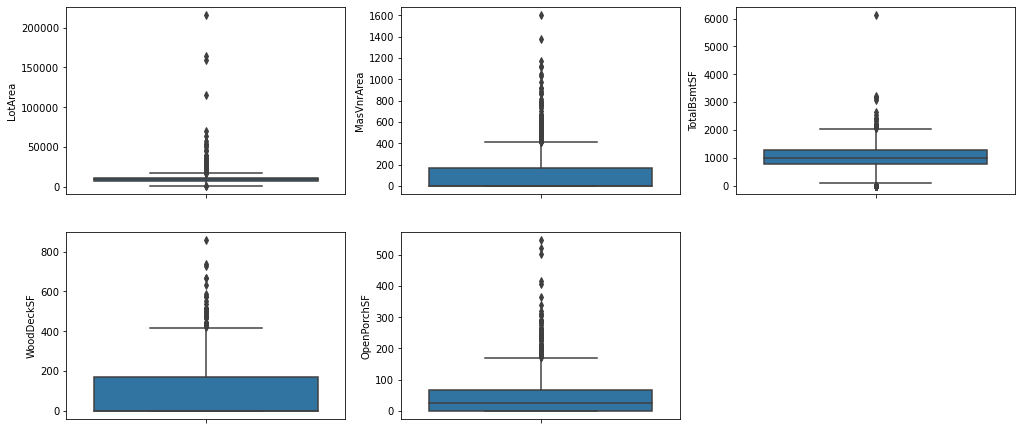

In [13816]:
#Check for outliers in all the numeric features as for below features difference between mean & median and 75% and max is large
plt.figure(figsize=(17,20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = house_data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = house_data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = house_data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = house_data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = house_data)


In [13817]:
#Removing Outliers

#Removing values beyond 98% for LotArea 
house_data = house_data[house_data['LotArea'] < house_data['LotArea'].quantile(0.98)]

#Removing values beyond 98% for MasVnrArea 
house_data = house_data[house_data['MasVnrArea'] < house_data['MasVnrArea'].quantile(0.98)]

#Removing values beyond 99% for TotalBsmtSF 
house_data = house_data[house_data['TotalBsmtSF'] < house_data['TotalBsmtSF'].quantile(0.99)]

#Removing values beyond 98% for WoodDeckSF 
house_data = house_data[house_data['WoodDeckSF'] < house_data['WoodDeckSF'].quantile(0.99)]

#Removing values beyond 99% for OpenPorchSF
house_data = house_data[house_data['OpenPorchSF'] < house_data['OpenPorchSF'].quantile(0.99)]

In [13818]:
#Determine the percentage of data retained

numeric_data = round(100*(len(house_data)/1460),2)
numeric_data

93.01

In [13819]:
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotFrontage     1358 non-null   float64
 1   LotArea         1358 non-null   int64  
 2   MasVnrArea      1358 non-null   float64
 3   BsmtFinSF1      1358 non-null   int64  
 4   BsmtFinSF2      1358 non-null   int64  
 5   BsmtUnfSF       1358 non-null   int64  
 6   TotalBsmtSF     1358 non-null   int64  
 7   1stFlrSF        1358 non-null   int64  
 8   2ndFlrSF        1358 non-null   int64  
 9   LowQualFinSF    1358 non-null   int64  
 10  GrLivArea       1358 non-null   int64  
 11  BsmtFullBath    1358 non-null   int64  
 12  BsmtHalfBath    1358 non-null   int64  
 13  FullBath        1358 non-null   int64  
 14  HalfBath        1358 non-null   int64  
 15  BedroomAbvGr    1358 non-null   int64  
 16  KitchenAbvGr    1358 non-null   int64  
 17  TotRmsAbvGrd    1358 non-null   i

#### Imputing Categorical cols. values.

In [13820]:
house_data[house_data['GarageQual'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
39      40          90       RL         65.0     6040   Pave      Reg   
48      49         190       RM         33.0     4456   Pave      Reg   
78      79          90       RL         72.0    10778   Pave      Reg   
88      89          50  C (all)        105.0     8470   Pave      IR1   
89      90          20       RL         60.0     8070   Pave      Reg   
99     100          20       RL         77.0     9320   Pave      IR1   
108    109          50       RM         85.0     8500   Pave      Reg   
125    126         190       RM         60.0     6780   Pave      Reg   
127    128          45       RM         55.0     4388   Pave      IR1   
140    141          20       RL         70.0    10500   Pave      Reg   
148    149          20       RL         63.0     7500   Pave      Reg   
155    156          50       RL         60.0     9600   Pave      Reg   
163    164          45       RL         55.0     5500   Pave      Reg   
165    166         190       RL         62.0    10106   Pave      Reg   
198    199          75       RM         92.0     5520   Pave      Reg   
210    211          30       RL         67.0     5604   Pave      Reg   
241    242          30       RM         40.0     3880   Pave      Reg   
250    251          30       RL         55.0     5350   Pave      IR1   
287    288          20       RL         69.0     8125   Pave      IR1   
291    292         190       RL         55.0     5687   Pave      Reg   
307    308          50       RM         69.0     7920   Pave      IR1   
375    376          30       RL         69.0    10020   Pave      IR1   
386    387          50       RL         58.0     8410   Pave      Reg   
393    394          30       RL         69.0     7446   Pave      Reg   
431    432          50       RM         60.0     5586   Pave      IR1   
434    435         180       RM         21.0     1890   Pave      Reg   
441    442          90       RL         92.0    12108   Pave      Reg   
464    465          20       RL         60.0     8430   Pave      Reg   
520    521         190       RL         60.0    10800   Pave      Reg   
528    529          30       RL         58.0     9098   Pave      IR1   
533    534          20       RL         50.0     5000   Pave      Reg   
535    536         190       RL         70.0     7000   Pave      Reg   
562    563          30       RL         63.0    13907   Pave      Reg   
582    583          90       RL         81.0    11841   Grvl      Reg   
613    614          20       RL         70.0     8402   Pave      Reg   
614    615         180       RM         21.0     1491   Pave      Reg   
620    621          30       RL         45.0     8248   Pave      Reg   
635    636         190       RH         60.0    10896   Pave      Reg   
636    637          30       RM         51.0     6120   Pave      Reg   
638    639          30       RL         67.0     8777   Pave      Reg   
649    650         180       RM         21.0     1936   Pave      Reg   
705    706         190       RM         70.0     5600   Pave      Reg   
710    711          30       RL         56.0     4130   Pave      IR1   
738    739          90       RL         60.0    10800   Pave      Reg   
750    751          50       RM         55.0     8800   Pave      Reg   
826    827          45       RM         50.0     6130   Pave      Reg   
843    844          90       RL         80.0     8000   Pave      Reg   
921    922          90       RL         67.0     8777   Pave      Reg   
942    943          90       RL         42.0     7711   Pave      IR1   
954    955          90       RL         35.0     9400   Pave      IR1   
960    961          20       RL         50.0     7207   Pave      IR1   
968    969          50       RM         50.0     5925   Pave      Reg   
970    971          50       RL         60.0    10800   Pave      Reg   
976    977          30       RL         51.0     5900   Pave      

In [13821]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['GarageQual']),['GarageQual']] = 'None'

Ideally we do solve Null values, by imputing it with mean, median or mode. 
- Here, probably the null values in garage quality mean that the houses does not have garage. We cannot impute Null values in col. gargage quality with good or bad or with mode value. 
- So probably we should put another category in the Null values called None.This means the garage does not exist, so there is None quality. So instead of imputing it with mode, we should impute it with None category.


In [13822]:
house_data['GarageQual']

0         TA
1         TA
2         TA
3         TA
4         TA
5         TA
6         TA
7         TA
8         Fa
9         Gd
10        TA
11        TA
12        TA
13        TA
14        TA
15        TA
16        TA
17        TA
18        TA
19        TA
20        TA
21        TA
22        TA
23        TA
24        TA
25        TA
26        TA
27        TA
28        TA
29        Fa
30        TA
31        TA
32        TA
33        TA
34        TA
35        TA
36        TA
38        TA
39      None
40        TA
41        TA
42        TA
43        TA
44        TA
45        TA
46        TA
47        TA
48      None
49        TA
50        TA
51        TA
52        TA
54        TA
55        TA
56        TA
57        TA
59        TA
60        TA
61        TA
62        TA
63        TA
65        TA
66        TA
67        TA
68        TA
69        TA
71        TA
72        TA
73        TA
74        TA
75        TA
76        TA
77        TA
78      None
79        TA
80        TA
81        TA

In [13823]:
# Inspect the nulls in the GarageYrBlt column
house_data[house_data['GarageQual'].isnull()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, SaleType, SaleCondition, SalePrice, GarageOldOrNew, IsRemodelled, house_age]
Index: []

Above result shows that there is no null values in GarageQual anymore. 

In [13824]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['BsmtQual']),['BsmtQual']] = 'None'

In [13825]:
house_data['BsmtQual']

0         Gd
1         Gd
2         Gd
3         TA
4         Gd
5         Gd
6         Ex
7         Gd
8         TA
9         TA
10        TA
11        Ex
12        TA
13        Gd
14        TA
15        TA
16        TA
17      None
18        TA
19        TA
20        Ex
21        TA
22        Gd
23        Gd
24        TA
25        Gd
26        TA
27        Ex
28        TA
29        TA
30        TA
31        TA
32        Ex
33        TA
34        Ex
35        Ex
36        Gd
38        TA
39      None
40        TA
41        TA
42        Gd
43        Gd
44        TA
45        Ex
46        Ex
47        Gd
48        TA
49        TA
50        Gd
51        TA
52        Gd
54        TA
55        TA
56        Gd
57        Gd
59        TA
60        Gd
61        TA
62        Gd
63        TA
65        Ex
66        Gd
67        Gd
68        TA
69        TA
71        TA
72        Gd
73        TA
74        Fa
75        Gd
76        TA
77        TA
78        TA
79        TA
80        Gd
81        Ex

In [13826]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['BsmtCond']),['BsmtCond']] = 'None'

In [13827]:
house_data['BsmtCond']

0         TA
1         TA
2         TA
3         Gd
4         TA
5         TA
6         TA
7         TA
8         TA
9         TA
10        TA
11        TA
12        TA
13        TA
14        TA
15        TA
16        TA
17      None
18        TA
19        TA
20        TA
21        TA
22        TA
23        TA
24        TA
25        TA
26        TA
27        TA
28        TA
29        TA
30        TA
31        TA
32        TA
33        TA
34        TA
35        TA
36        TA
38        TA
39      None
40        TA
41        TA
42        TA
43        TA
44        TA
45        TA
46        TA
47        TA
48        TA
49        TA
50        TA
51        TA
52        TA
54        TA
55        TA
56        TA
57        TA
59        TA
60        TA
61        Fa
62        Gd
63        TA
65        TA
66        TA
67        TA
68        TA
69        TA
71        TA
72        TA
73        TA
74        TA
75        TA
76        TA
77        TA
78        TA
79        TA
80        TA
81        Gd

In [13828]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['BsmtExposure']),['BsmtExposure']] = 'None'

In [13829]:
house_data['BsmtExposure']

0         No
1         Gd
2         Mn
3         No
4         Av
5         No
6         Av
7         Mn
8         No
9         No
10        No
11        No
12        No
13        Av
14        No
15        No
16        No
17      None
18        No
19        No
20        Av
21        No
22        No
23        No
24        Mn
25        No
26        Mn
27        No
28        Gd
29        No
30        No
31        No
32        Av
33        No
34        No
35        Av
36        No
38        No
39      None
40        No
41        Gd
42        Av
43        Av
44        No
45        No
46        No
47        Av
48        No
49        No
50        Av
51        No
52        Gd
54        No
55        No
56        No
57        No
59        Av
60        No
61        No
62        Mn
63        No
65        Av
66        Gd
67        Av
68        No
69        No
71        No
72        No
73        No
74        No
75        Gd
76        No
77        No
78        No
79        No
80        No
81        No

In [13830]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['BsmtFinType1']),['BsmtFinType1']] = 'None'

In [13831]:
house_data['BsmtFinType1']

0        GLQ
1        ALQ
2        GLQ
3        ALQ
4        GLQ
5        GLQ
6        GLQ
7        ALQ
8        Unf
9        GLQ
10       Rec
11       GLQ
12       ALQ
13       Unf
14       BLQ
15       Unf
16       ALQ
17      None
18       GLQ
19       LwQ
20       Unf
21       Unf
22       Unf
23       GLQ
24       Rec
25       Unf
26       BLQ
27       GLQ
28       BLQ
29       Unf
30       Unf
31       Unf
32       Unf
33       Rec
34       GLQ
35       Unf
36       Unf
38       GLQ
39      None
40       Rec
41       BLQ
42       ALQ
43       LwQ
44       ALQ
45       GLQ
46       GLQ
47       GLQ
48       Unf
49       BLQ
50       GLQ
51       Unf
52       LwQ
54       ALQ
55       BLQ
56       GLQ
57       Unf
59       ALQ
60       ALQ
61       Unf
62       GLQ
63       Unf
65       Unf
66       GLQ
67       GLQ
68       Unf
69       BLQ
71       ALQ
72       Unf
73       ALQ
74       Unf
75       GLQ
76       ALQ
77       BLQ
78       Unf
79       Unf
80       Rec
81       GLQ

In [13832]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['BsmtFinType2']),['BsmtFinType2']] = 'None'

In [13833]:
house_data['BsmtFinType2']

0        Unf
1        Unf
2        Unf
3        Unf
4        Unf
5        Unf
6        Unf
7        BLQ
8        Unf
9        Unf
10       Unf
11       Unf
12       Unf
13       Unf
14       Unf
15       Unf
16       Unf
17      None
18       Unf
19       Unf
20       Unf
21       Unf
22       Unf
23       Unf
24       ALQ
25       Unf
26       Rec
27       Unf
28       Unf
29       Unf
30       Unf
31       Unf
32       Unf
33       Unf
34       Unf
35       Unf
36       Unf
38       Unf
39      None
40       Unf
41       Unf
42       LwQ
43       BLQ
44       BLQ
45       Unf
46       Unf
47       Unf
48       Unf
49       Unf
50       Unf
51       Unf
52       GLQ
54       Unf
55       Unf
56       Unf
57       Unf
59       Unf
60       Unf
61       Unf
62       Unf
63       Unf
65       Unf
66       Unf
67       Unf
68       Unf
69       Unf
71       Unf
72       Unf
73       BLQ
74       Unf
75       Unf
76       Unf
77       GLQ
78       Unf
79       Unf
80       Unf
81       Unf

In [13834]:
house_data['Electrical'].value_counts()

SBrkr    1235
FuseA      91
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [13835]:
house_data['Electrical'].mode()[0]

'SBrkr'

In [13836]:
#Fill up the nulls in the Android Version column with the above value
house_data['Electrical'] = house_data['Electrical'].fillna(house_data['Electrical'].mode()[0])

In [13837]:
house_data['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
5       SBrkr
6       SBrkr
7       SBrkr
8       FuseF
9       SBrkr
10      SBrkr
11      SBrkr
12      SBrkr
13      SBrkr
14      SBrkr
15      FuseA
16      SBrkr
17      SBrkr
18      SBrkr
19      SBrkr
20      SBrkr
21      FuseF
22      SBrkr
23      SBrkr
24      SBrkr
25      SBrkr
26      SBrkr
27      SBrkr
28      SBrkr
29      SBrkr
30      SBrkr
31      SBrkr
32      SBrkr
33      SBrkr
34      SBrkr
35      SBrkr
36      SBrkr
38      SBrkr
39      FuseP
40      SBrkr
41      SBrkr
42      SBrkr
43      SBrkr
44      FuseA
45      SBrkr
46      SBrkr
47      SBrkr
48      SBrkr
49      SBrkr
50      SBrkr
51      SBrkr
52      SBrkr
54      SBrkr
55      SBrkr
56      SBrkr
57      SBrkr
59      SBrkr
60      SBrkr
61      SBrkr
62      SBrkr
63      SBrkr
65      SBrkr
66      SBrkr
67      SBrkr
68      SBrkr
69      SBrkr
71      SBrkr
72      SBrkr
73      SBrkr
74      SBrkr
75      SBrkr
76    

In [13838]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['FireplaceQu']),['FireplaceQu']] = 'None'

In [13839]:
house_data['FireplaceQu']

0       None
1         TA
2         TA
3         Gd
4         TA
5       None
6         Gd
7         TA
8         TA
9         TA
10      None
11        Gd
12      None
13        Gd
14        Fa
15      None
16        TA
17      None
18      None
19      None
20        Gd
21        Gd
22        Gd
23        TA
24        TA
25        Gd
26      None
27        Gd
28        Gd
29      None
30      None
31      None
32      None
33        Gd
34        Gd
35        Gd
36      None
38      None
39      None
40        TA
41        Gd
42      None
43      None
44      None
45        Gd
46        Ex
47      None
48      None
49      None
50      None
51        Gd
52      None
54        TA
55        Gd
56      None
57      None
59      None
60      None
61      None
62        Gd
63      None
65        Gd
66        Gd
67      None
68      None
69        TA
71      None
72        TA
73      None
74      None
75      None
76      None
77      None
78      None
79      None
80        Gd
81      None

In [13840]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['GarageType']),['GarageType']] = 'None'

In [13841]:
house_data['GarageType']

0        Attchd
1        Attchd
2        Attchd
3        Detchd
4        Attchd
5        Attchd
6        Attchd
7        Attchd
8        Detchd
9        Attchd
10       Detchd
11      BuiltIn
12       Detchd
13       Attchd
14       Attchd
15       Detchd
16       Attchd
17      CarPort
18       Detchd
19       Attchd
20      BuiltIn
21       Attchd
22       Attchd
23       Attchd
24       Attchd
25       Attchd
26       Detchd
27       Attchd
28       Attchd
29       Detchd
30       Detchd
31       Attchd
32       Attchd
33       Attchd
34       Attchd
35      BuiltIn
36       Attchd
38       Detchd
39         None
40       Attchd
41       Attchd
42       Attchd
43       Detchd
44       Attchd
45       Attchd
46       Attchd
47       Attchd
48         None
49       Attchd
50       Attchd
51       Detchd
52      CarPort
54       Detchd
55       Attchd
56       Attchd
57       Attchd
59       Detchd
60       Detchd
61       Detchd
62       Attchd
63       Detchd
65      BuiltIn
66      

In [13842]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['GarageFinish']),['GarageFinish']] = 'None'

In [13843]:
house_data['GarageFinish']

0        RFn
1        RFn
2        RFn
3        Unf
4        RFn
5        Unf
6        RFn
7        RFn
8        Unf
9        RFn
10       Unf
11       Fin
12       Unf
13       RFn
14       RFn
15       Unf
16       Fin
17       Unf
18       Unf
19       Unf
20       RFn
21       Unf
22       RFn
23       Unf
24       Unf
25       RFn
26       Unf
27       RFn
28       RFn
29       Unf
30       Unf
31       Unf
32       RFn
33       RFn
34       Fin
35       Fin
36       Unf
38       Unf
39      None
40       RFn
41       RFn
42       RFn
43       Unf
44       RFn
45       RFn
46       RFn
47       RFn
48      None
49       Unf
50       Fin
51       Unf
52       Unf
54       Unf
55       RFn
56       Fin
57       RFn
59       Unf
60       Unf
61       Unf
62       RFn
63       Unf
65       RFn
66       RFn
67       RFn
68       Unf
69       Fin
71       Unf
72       Fin
73       Unf
74       Unf
75       Unf
76       Unf
77       Unf
78      None
79       Unf
80       Fin
81       Fin

In [13844]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['GarageQual']),['GarageQual']] = 'None'

In [13845]:
house_data['GarageQual']

0         TA
1         TA
2         TA
3         TA
4         TA
5         TA
6         TA
7         TA
8         Fa
9         Gd
10        TA
11        TA
12        TA
13        TA
14        TA
15        TA
16        TA
17        TA
18        TA
19        TA
20        TA
21        TA
22        TA
23        TA
24        TA
25        TA
26        TA
27        TA
28        TA
29        Fa
30        TA
31        TA
32        TA
33        TA
34        TA
35        TA
36        TA
38        TA
39      None
40        TA
41        TA
42        TA
43        TA
44        TA
45        TA
46        TA
47        TA
48      None
49        TA
50        TA
51        TA
52        TA
54        TA
55        TA
56        TA
57        TA
59        TA
60        TA
61        TA
62        TA
63        TA
65        TA
66        TA
67        TA
68        TA
69        TA
71        TA
72        TA
73        TA
74        TA
75        TA
76        TA
77        TA
78      None
79        TA
80        TA
81        TA

In [13846]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['GarageCond']),['GarageCond']] = 'None'

In [13847]:
house_data['GarageCond']

0         TA
1         TA
2         TA
3         TA
4         TA
5         TA
6         TA
7         TA
8         TA
9         TA
10        TA
11        TA
12        TA
13        TA
14        TA
15        TA
16        TA
17        TA
18        TA
19        TA
20        TA
21        TA
22        TA
23        TA
24        TA
25        TA
26        TA
27        TA
28        TA
29        TA
30        Fa
31        TA
32        TA
33        TA
34        TA
35        TA
36        TA
38        TA
39      None
40        TA
41        TA
42        Gd
43        TA
44        TA
45        TA
46        TA
47        TA
48      None
49        TA
50        TA
51        TA
52        TA
54        TA
55        TA
56        TA
57        TA
59        TA
60        TA
61        TA
62        TA
63        TA
65        TA
66        TA
67        TA
68        TA
69        TA
71        TA
72        TA
73        TA
74        TA
75        TA
76        TA
77        TA
78      None
79        TA
80        TA
81        TA

In [13848]:
#Imputing col.which are missing with some meaning by another new category 'None'.
house_data.loc[pd.isnull(house_data['MasVnrType']),['MasVnrType']] = 'None'

In [13849]:
house_data['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
5          None
6         Stone
7         Stone
8          None
9          None
10         None
11        Stone
12         None
13        Stone
14      BrkFace
15         None
16      BrkFace
17         None
18         None
19         None
20      BrkFace
21         None
22      BrkFace
23         None
24         None
25        Stone
26         None
27        Stone
28         None
29         None
30         None
31         None
32         None
33         None
34      BrkFace
35        Stone
36         None
38         None
39         None
40      BrkFace
41         None
42         None
43         None
44         None
45      BrkFace
46         None
47         None
48         None
49         None
50         None
51         None
52         None
54         None
55      BrkFace
56      BrkFace
57         None
59         None
60         None
61         None
62        Stone
63         None
65      BrkFace
66      

In [13850]:
#Drop the categorical col. with high value counts ie, more than 85%


def getHighCategoricalValueCounts():
    column = []
    categorical_col = house_data.select_dtypes(include = ['object'])
    for col in (categorical_col):
        if (house_data[col].value_counts().max() >= 1241):
            column.append(col)
        return column
    
colToRemove = getHighCategoricalValueCounts()
house_data.drop(colToRemove, axis = 1, inplace = True)

house_data.head()

    

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           0        None     Attchd          RFn           2         548   
1           1          TA     Attchd          RFn           2         460   
2       

### Data Visualization

#### Distribution plot of a numerical column to check whether outliers or not

- as outliers affect mean alot. If there are outliers, we will impute missing values with median . If outliers are not present then we can fill null values with mean value as well.

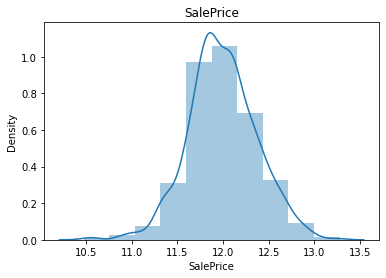

In [13851]:
#check if target variable is normally distributed or not
house_data['SalePrice'] = np.log1p(house_data['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_data['SalePrice'], bins=10)
plt.show()

In [13852]:
house_data.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1358.000000  1358.000000  1358.000000   1358.000000  1358.000000   
mean    729.169367    57.157585    68.771723   9434.943299     6.023564   
std     422.257565    42.291826    19.427951   3616.150840     1.319668   
min       1.000000    20.000000    21.000000   1300.000000     1.000000   
25%     364.250000    20.000000    60.000000   7416.250000     5.000000   
50%     729.500000    50.000000    69.000000   9246.500000     6.000000   
75%    1093.750000    70.000000    78.000000  11268.750000     7.000000   
max    1459.000000   190.000000   182.000000  25095.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1358.000000  1358.000000  1358.000000  1358.000000  1358.000000   
mean      5.590574    83.878498   415.770250    44.084683   557.894698   
std       1.121361   134.061884   410.462751   155.310190   429.213847   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     0.000000     0.000000     0.000000   218.250000   
50%       5.000000     0.000000   364.500000     0.000000   477.500000   
75%       6.000000   144.750000   686.000000     0.000000   796.750000   
max       9.000000   640.000000  1646.000000  1474.000000  2002.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1358.000000  1358.000000  1358.000000   1358.000000  1358.000000   
mean   1017.749632  1127.438881   335.076583      5.994845  1468.510309   
std     377.761875   340.208571   420.469357     49.289551   466.510415   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     784.000000   865.250000     0.000000      0.000000  1118.000000   
50%     970.000000  1065.000000     0.000000      0.000000  1432.000000   
75%    1251.750000  1349.750000   716.750000      0.000000  1725.750000   
max    2006.000000  2898.000000  1818.000000    572.000000  3608.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1358.000000   1358.000000  1358.000000  1358.000000   1358.000000   
mean       0.408689      0.056701     1.544919     0.369661      2.851988   
std        0.510882      0.237641     0.540722     0.500869      0.809509   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1358.000000   1358.000000  1358.000000  1358.000000  1358.000000   
mean       1.048601      6.425626     0.575847     1.729013   459.940353   
std        0.225154      1.570732     0.624770     0.737598   204.576375   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     1.000000   312.000000   
50%        1.000000      6.000000     1.000000     2.000000   471.000000   
75%        1.000000      7.000000     1.000000     2.000000   576.000000   
max        3.000000     14.000000     3.000000     4.000000  1248.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1358.000000  1358.000000    1358.000000  1358.000000  1358.000000   
mean     84.852725    41.502946      22.316642     3.665685    14.023564   
std     108.828790    55.606136      60.410655    30.383743    53.171579   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    21.500000       0.000000     0.000000     0.000000   
75%     160.000000    63.000000       0.000000     0.000000     0.000000   
max     46

<Figure size 720x360 with 0 Axes>

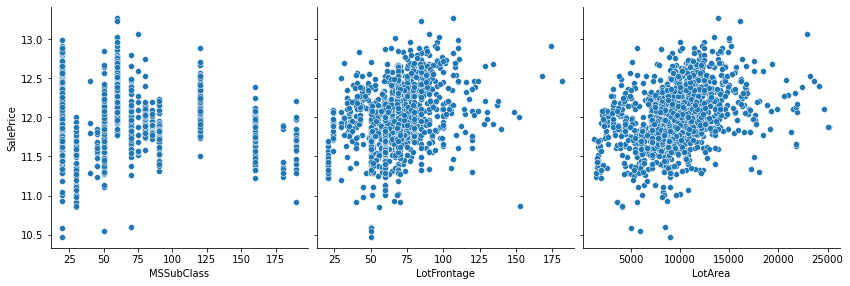

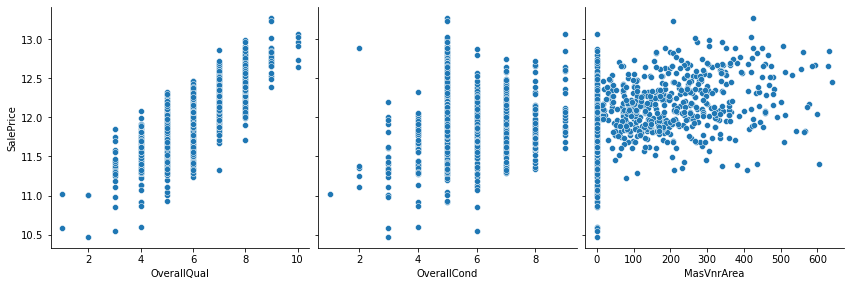

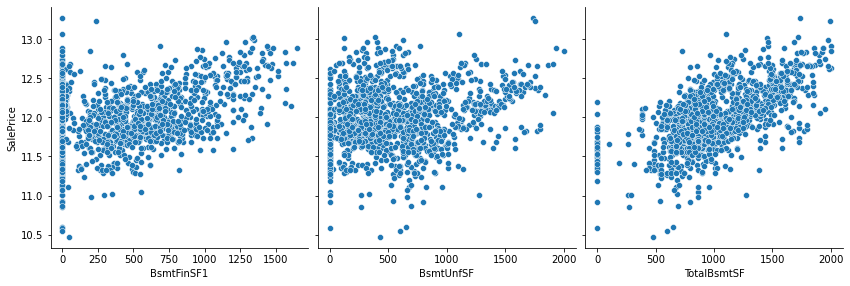

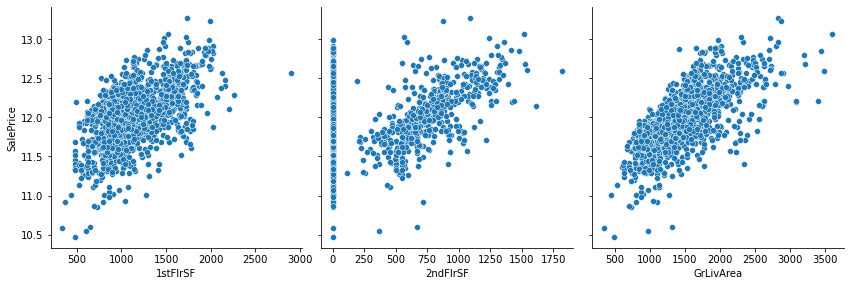

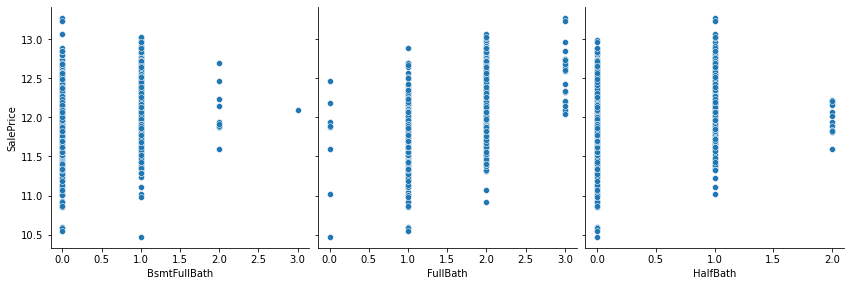

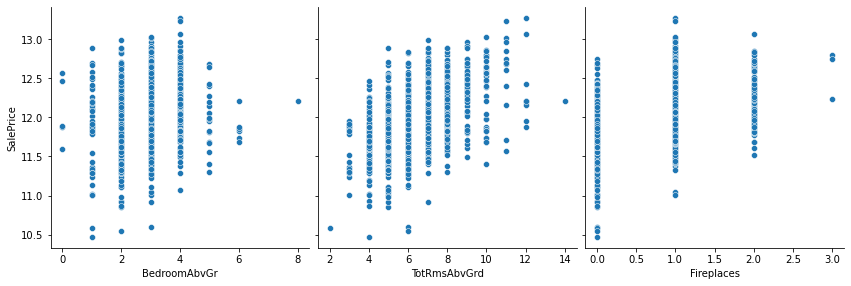

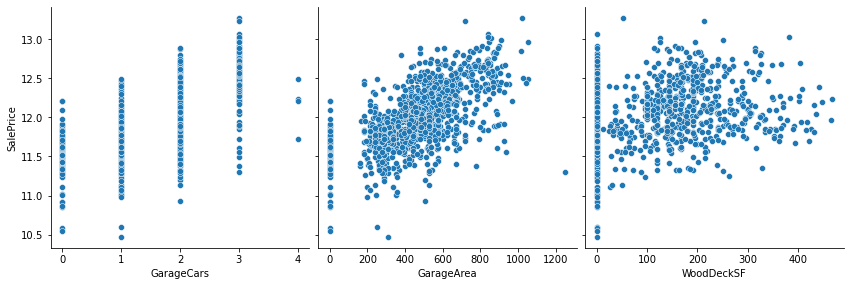

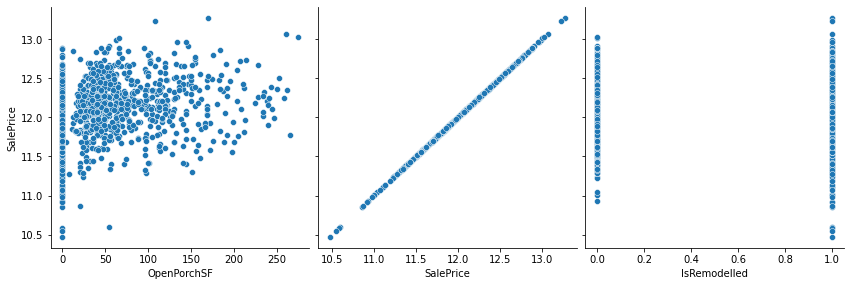

In [13853]:
# Plot some numerical values using pairplot
plt.figure(figsize=(10,5))
sns.pairplot(house_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter', diag_kind=None)
sns.pairplot(house_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',diag_kind=None)
sns.pairplot(house_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',diag_kind=None)
sns.pairplot(house_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',diag_kind=None)
sns.pairplot(house_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',diag_kind=None)
sns.pairplot(house_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',diag_kind=None)
sns.pairplot(house_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',diag_kind=None)
sns.pairplot(house_data, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',diag_kind=None)
# sns.pairplot(house_data, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',diag_kind=None)
plt.show()

<b>Assumption 1 </b>:Here We can observe clearly in the above plot that  some predictors(X)(ie, 1stFlrSF, GrLivArea) is in linear relationship with target variable SalePrice (Y). Therefore from initial data visualization we can say that there is atleast one feature which is showing relationship with dependent variable demand(ie, SalePrice here)

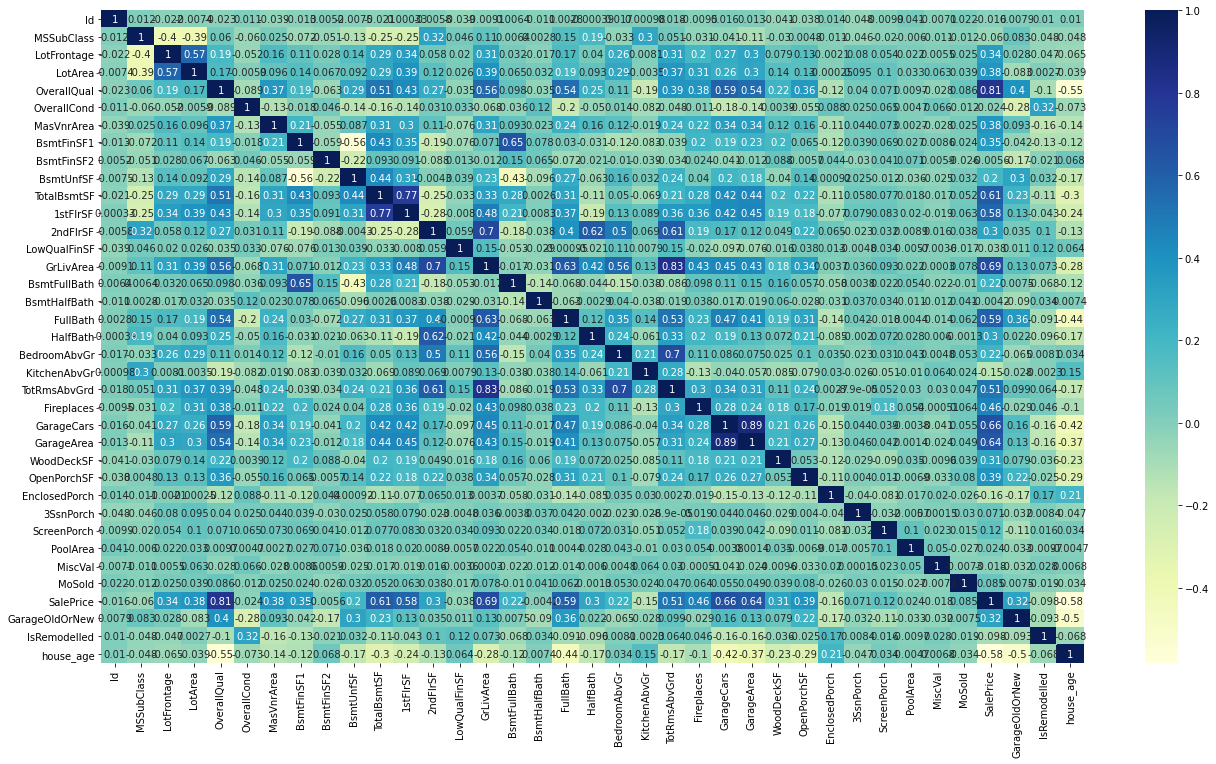

In [13854]:
#heatmap
plt.figure(figsize = (22,12))
sns.heatmap(house_data.corr(),annot = True, cmap= 'YlGnBu')
plt.show()

The heatmap shows some useful insights:

Correlation of SalePrice with independent variables:

- SalePrice is highly (positively) correlated with  TotalBsmtSF, 1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea.

- SalePrice is negatively correlated to BsmtFinSF2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,EnclosedPorch ,sRemodelled 

## 3. Data Preparation/Pre-Processing


#### Data Preparation

Let's now prepare the data and build the model.

- Encoding :
 - Other categorical vars to dummy vars
 - RFE (feature selection)
- Splitting into train and test
- Rescaling of variables

In [13855]:
#Let's check for the below cols.which are ordinal in nature
house_data['n_LotShape'] = house_data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house_data['n_ExterQual'] = house_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_data['n_BsmtQual'] = house_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_data['n_BsmtExposure'] = house_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_data['n_BsmtFinType1'] = house_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house_data['n_HeatingQC'] = house_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_data['n_KitchenQual'] = house_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_data['n_FireplaceQu'] = house_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_data['n_GarageFinish'] = house_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house_data['n_BldgType'] = house_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house_data['n_HouseStyle'] = house_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_data['n_LotConfig'] = house_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house_data['n_MasVnrType'] = house_data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house_data['n_SaleCondition'] = house_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           0        None     Attchd          RFn           2         548   
1           1          TA     Attchd          RFn           2         460   
2       

In [13856]:
#drop the old col.
house_data = house_data.drop(['Id','LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

In [13857]:
house_data

MSSubClass MSZoning  LotFrontage  LotArea Street LandContour Utilities  \
0             60       RL         65.0     8450   Pave         Lvl    AllPub   
1             20       RL         80.0     9600   Pave         Lvl    AllPub   
2             60       RL         68.0    11250   Pave         Lvl    AllPub   
3             70       RL         60.0     9550   Pave         Lvl    AllPub   
4             60       RL         84.0    14260   Pave         Lvl    AllPub   
5             50       RL         85.0    14115   Pave         Lvl    AllPub   
6             20       RL         75.0    10084   Pave         Lvl    AllPub   
7             60       RL         69.0    10382   Pave         Lvl    AllPub   
8             50       RM         51.0     6120   Pave         Lvl    AllPub   
9            190       RL         50.0     7420   Pave         Lvl    AllPub   
10            20       RL         70.0    11200   Pave         Lvl    AllPub   
11            60       RL         85.0    11924   Pave         Lvl    AllPub   
12            20       RL         69.0    12968   Pave         Lvl    AllPub   
13            20       RL         91.0    10652   Pave         Lvl    AllPub   
14            20       RL         69.0    10920   Pave         Lvl    AllPub   
15            45       RM         51.0     6120   Pave         Lvl    AllPub   
16            20       RL         69.0    11241   Pave         Lvl    AllPub   
17            90       RL         72.0    10791   Pave         Lvl    AllPub   
18            20       RL         66.0    13695   Pave         Lvl    AllPub   
19            20       RL         70.0     7560   Pave         Lvl    AllPub   
20            60       RL        101.0    14215   Pave         Lvl    AllPub   
21            45       RM         57.0     7449   Pave         Bnk    AllPub   
22            20       RL         75.0     9742   Pave         Lvl    AllPub   
23           120       RM         44.0     4224   Pave         Lvl    AllPub   
24            20       RL         69.0     8246   Pave         Lvl    AllPub   
25            20       RL        110.0    14230   Pave         Lvl    AllPub   
26            20       RL         60.0     7200   Pave         Lvl    AllPub   
27            20       RL         98.0    11478   Pave         Lvl    AllPub   
28            20       RL         47.0    16321   Pave         Lvl    AllPub   
29            30       RM         60.0     6324   Pave         Lvl    AllPub   
30            70  C (all)         50.0     8500   Pave         Lvl    AllPub   
31            20       RL         69.0     8544   Pave         Lvl    AllPub   
32            20       RL         85.0    11049   Pave         Lvl    AllPub   
33            20       RL         70.0    10552   Pave         Lvl    AllPub   
34           120       RL         60.0     7313   Pave         Lvl    AllPub   
35            60       RL        108.0    13418   Pave         Lvl    AllPub   
36            20       RL        112.0    10859   Pave         Lvl    AllPub   
38            20       RL         68.0     7922   Pave         Lvl    AllPub   
39            90       RL         65.0     6040   Pave         Lvl    AllPub   
40            20       RL         84.0     8658   Pave         Lvl    AllPub   
41            20       RL        115.0    16905   Pave         Lvl    AllPub   
42            85       RL         69.0     9180   Pave         Lvl    AllPub   
43            20       RL         69.0     9200   Pave         Lvl    AllPub   
44            20       RL         70.0     7945   Pave         Lvl    AllPub   
45           120       RL         61.0     7658   Pave         Lvl    AllPub   
46            50       RL         48.0    12822   Pave         Lvl    AllPub   
47            20       FV         84.0    11096   Pave         Lvl    AllPub   
48           190       RM         33.0     4456   Pave         Lvl    AllPub   
49            20       RL         66.0     7742   Pave         Lvl    AllPub   
50    

Dividing into X and Y sets for the model building

In [13858]:
# split into X and y

X = house_data.loc[:,['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LandContour','Utilities','LandSlope','Neighborhood','Condition1','Condition2','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrArea','ExterCond','Foundation','BsmtCond','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','PoolArea','MiscVal','MoSold','SaleType','GarageOldOrNew','IsRemodelled','house_age','n_LotShape','n_ExterQual','n_BsmtQual','n_BsmtExposure','n_BsmtFinType1','n_HeatingQC','n_KitchenQual','n_FireplaceQu','n_GarageFinish','n_BldgType','n_HouseStyle','n_LotConfig','n_MasVnrType','n_SaleCondition','n_LotShape','n_ExterQual','n_BsmtQual','n_BsmtExposure','n_BsmtFinType1','n_HeatingQC','n_KitchenQual','n_FireplaceQu','n_GarageFinish','n_BldgType','n_HouseStyle','n_LotConfig','n_MasVnrType','n_SaleCondition']]
# predictors in variable X

y = house_data['SalePrice']  # response variable in Y



In [13859]:
# creating dummy variables for categorical variables
# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

MSZoning Street LandContour Utilities LandSlope Neighborhood Condition1  \
0       RL   Pave         Lvl    AllPub       Gtl      CollgCr       Norm   
1       RL   Pave         Lvl    AllPub       Gtl      Veenker      Feedr   
2       RL   Pave         Lvl    AllPub       Gtl      CollgCr       Norm   
3       RL   Pave         Lvl    AllPub       Gtl      Crawfor       Norm   
4       RL   Pave         Lvl    AllPub       Gtl      NoRidge       Norm   

  Condition2 RoofStyle RoofMatl Exterior1st Exterior2nd ExterCond Foundation  \
0       Norm     Gable  CompShg     VinylSd     VinylSd        TA      PConc   
1       Norm     Gable  CompShg     MetalSd     MetalSd        TA     CBlock   
2       Norm     Gable  CompShg     VinylSd     VinylSd        TA      PConc   
3       Norm     Gable  CompShg     Wd Sdng     Wd Shng        TA     BrkTil   
4       Norm     Gable  CompShg     VinylSd     VinylSd        TA      PConc   

  BsmtCond BsmtFinType2 Heating CentralAir Electrical Functional GarageType  \
0       TA          Unf    GasA          Y      SBrkr        Typ     Attchd   
1       TA          Unf    GasA          Y      SBrkr        Typ     Attchd   
2       TA          Unf    GasA          Y      SBrkr        Typ     Attchd   
3       Gd          Unf    GasA          Y      SBrkr        Typ     Detchd   
4       TA          Unf    GasA          Y      SBrkr        Typ     Attchd   

  GarageQual GarageCond PavedDrive SaleType  
0         TA         TA          Y       WD  
1         TA         TA          Y       WD  
2         TA         TA          Y       WD  
3         TA         TA          Y       WD  
4         TA         TA          Y       WD

In [13860]:
round(100*(house_categorical['Neighborhood'].value_counts()/len(house_categorical['Neighborhood'])),2)

NAmes      15.68
CollgCr    10.97
OldTown     7.95
Edwards     7.07
Somerst     5.89
Gilbert     5.74
Sawyer      5.23
NWAmes      5.15
NridgHt     4.49
SawyerW     4.20
BrkSide     4.05
Crawfor     3.68
Mitchel     3.31
IDOTRR      2.65
Timber      2.36
SWISU       1.84
NoRidge     1.77
StoneBr     1.55
ClearCr     1.33
Blmngtn     1.25
BrDale      1.18
MeadowV     1.10
Veenker     0.74
NPkVill     0.66
Blueste     0.15
Name: Neighborhood, dtype: float64

In [13861]:
house_categorical['Neighborhood'].value_counts()

NAmes      213
CollgCr    149
OldTown    108
Edwards     96
Somerst     80
Gilbert     78
Sawyer      71
NWAmes      70
NridgHt     61
SawyerW     57
BrkSide     55
Crawfor     50
Mitchel     45
IDOTRR      36
Timber      32
SWISU       25
NoRidge     24
StoneBr     21
ClearCr     18
Blmngtn     17
BrDale      16
MeadowV     15
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [13862]:
#Combining different small categories less than 5% and assigning to new category 'other_Land'.
house_categorical.loc[house_categorical['Neighborhood'].isin((house_categorical['Neighborhood'].value_counts()[house_categorical['Neighborhood'].value_counts() < 70]).index), 'Neighborhood'] = 'other_Neighborhood'

In [13863]:
house_categorical['Neighborhood']

0                  CollgCr
1       other_Neighborhood
2                  CollgCr
3       other_Neighborhood
4       other_Neighborhood
5       other_Neighborhood
6                  Somerst
7                   NWAmes
8                  OldTown
9       other_Neighborhood
10                  Sawyer
11      other_Neighborhood
12                  Sawyer
13                 CollgCr
14                   NAmes
15      other_Neighborhood
16                   NAmes
17                  Sawyer
18      other_Neighborhood
19                   NAmes
20      other_Neighborhood
21      other_Neighborhood
22                 CollgCr
23      other_Neighborhood
24                  Sawyer
25      other_Neighborhood
26                   NAmes
27      other_Neighborhood
28                   NAmes
29      other_Neighborhood
30      other_Neighborhood
31                  Sawyer
32                 CollgCr
33                   NAmes
34      other_Neighborhood
35      other_Neighborhood
36                 CollgCr
3

In [13864]:
round(100*(house_categorical['Condition1'].value_counts()/len(house_categorical['Condition1'])),2)

Norm      86.23
Feedr      5.82
Artery     3.39
RRAn       1.69
PosN       1.03
RRAe       0.81
PosA       0.52
RRNn       0.37
RRNe       0.15
Name: Condition1, dtype: float64

In [13865]:
house_categorical['Condition1'].value_counts()

Norm      1171
Feedr       79
Artery      46
RRAn        23
PosN        14
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [13866]:
#Combining different small categories less than 5% and assigning to new category 'other_Land'.
house_categorical.loc[house_categorical['Condition1'].isin((house_categorical['Condition1'].value_counts()[house_categorical['Condition1'].value_counts() < 50]).index), 'Condition1'] = 'other_Condition1'

In [13867]:
house_categorical['Condition1']

0                   Norm
1                  Feedr
2                   Norm
3                   Norm
4                   Norm
5                   Norm
6                   Norm
7       other_Condition1
8       other_Condition1
9       other_Condition1
10                  Norm
11                  Norm
12                  Norm
13                  Norm
14                  Norm
15                  Norm
16                  Norm
17                  Norm
18      other_Condition1
19                  Norm
20                  Norm
21                  Norm
22                  Norm
23                  Norm
24                  Norm
25                  Norm
26                  Norm
27                  Norm
28                  Norm
29                 Feedr
30                 Feedr
31                  Norm
32                  Norm
33                  Norm
34                  Norm
35                  Norm
36                  Norm
38                  Norm
39                  Norm
40                  Norm


In [13868]:
round(100*(house_categorical['Exterior1st'].value_counts()/len(house_categorical['Exterior1st'])),2)

VinylSd    35.79
HdBoard    15.54
MetalSd    15.54
Wd Sdng    13.33
Plywood     7.14
CemntBd     3.90
BrkFace     3.24
WdShing     1.84
Stucco      1.69
AsbShng     1.47
BrkComm     0.15
Stone       0.15
ImStucc     0.07
CBlock      0.07
AsphShn     0.07
Name: Exterior1st, dtype: float64

In [13869]:
house_categorical['Exterior1st'].value_counts()

VinylSd    486
HdBoard    211
MetalSd    211
Wd Sdng    181
Plywood     97
CemntBd     53
BrkFace     44
WdShing     25
Stucco      23
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [13870]:
#Combining different small categories less than 5% and assigning to new category 'other_Land'.
house_categorical.loc[house_categorical['Exterior1st'].isin((house_categorical['Exterior1st'].value_counts()[house_categorical['Exterior1st'].value_counts() < 60]).index), 'Exterior1st'] = 'other_Exterior1st'

In [13871]:
house_categorical['Exterior1st']

0                 VinylSd
1                 MetalSd
2                 VinylSd
3                 Wd Sdng
4                 VinylSd
5                 VinylSd
6                 VinylSd
7                 HdBoard
8       other_Exterior1st
9                 MetalSd
10                HdBoard
11      other_Exterior1st
12                HdBoard
13                VinylSd
14                MetalSd
15                Wd Sdng
16                Wd Sdng
17                MetalSd
18                VinylSd
19      other_Exterior1st
20                VinylSd
21                Wd Sdng
22                VinylSd
23      other_Exterior1st
24                Plywood
25                VinylSd
26                Wd Sdng
27                VinylSd
28                MetalSd
29                MetalSd
30      other_Exterior1st
31                HdBoard
32                VinylSd
33      other_Exterior1st
34                MetalSd
35                VinylSd
36                VinylSd
38                VinylSd
39      othe

In [13872]:
round(100*(house_categorical['Exterior2nd'].value_counts()/len(house_categorical['Exterior2nd'])),2)

VinylSd    34.98
MetalSd    15.10
HdBoard    14.43
Wd Sdng    13.11
Plywood     9.35
CmentBd     3.90
Wd Shng     2.58
Stucco      1.77
BrkFace     1.55
AsbShng     1.47
ImStucc     0.59
Brk Cmn     0.52
Stone       0.29
AsphShn     0.22
CBlock      0.07
Other       0.07
Name: Exterior2nd, dtype: float64

In [13873]:
house_categorical['Exterior2nd'].value_counts()

VinylSd    475
MetalSd    205
HdBoard    196
Wd Sdng    178
Plywood    127
CmentBd     53
Wd Shng     35
Stucco      24
BrkFace     21
AsbShng     20
ImStucc      8
Brk Cmn      7
Stone        4
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [13874]:
#Combining different small categories less than 5% and assigning to new category 'other_Ext'.
house_categorical.loc[house_categorical['Exterior2nd'].isin((house_categorical['Exterior2nd'].value_counts()[house_categorical['Exterior2nd'].value_counts() < 60]).index), 'Exterior2nd'] = 'other_Exterior2nd'

In [13875]:
house_categorical['Exterior2nd']

0                 VinylSd
1                 MetalSd
2                 VinylSd
3       other_Exterior2nd
4                 VinylSd
5                 VinylSd
6                 VinylSd
7                 HdBoard
8       other_Exterior2nd
9                 MetalSd
10                HdBoard
11      other_Exterior2nd
12                Plywood
13                VinylSd
14                MetalSd
15                Wd Sdng
16                Wd Sdng
17                MetalSd
18                VinylSd
19                Plywood
20                VinylSd
21                Wd Sdng
22                VinylSd
23      other_Exterior2nd
24                Plywood
25                VinylSd
26                Wd Sdng
27                VinylSd
28                MetalSd
29                MetalSd
30      other_Exterior2nd
31                HdBoard
32                VinylSd
33      other_Exterior2nd
34                MetalSd
35                VinylSd
36                VinylSd
38                VinylSd
39          

In [13876]:
round(100*(house_categorical['BsmtFinType2'].value_counts()/len(house_categorical['BsmtFinType2'])),2)

Unf     86.23
Rec      3.61
LwQ      3.09
None     2.72
BLQ      2.14
ALQ      1.25
GLQ      0.96
Name: BsmtFinType2, dtype: float64

In [13877]:
house_categorical['BsmtFinType2'].value_counts()

Unf     1171
Rec       49
LwQ       42
None      37
BLQ       29
ALQ       17
GLQ       13
Name: BsmtFinType2, dtype: int64

In [13878]:
# #Combining different small categories less than 5% and assigning to new category 'other_Ext'.
house_categorical.loc[house_categorical['BsmtFinType2'].isin((house_categorical['BsmtFinType2'].value_counts()[house_categorical['BsmtFinType2'].value_counts() < 55]).index), 'BsmtFinType2'] = 'other_BsmtFinType2'

In [13879]:
house_categorical['BsmtFinType2']

0                      Unf
1                      Unf
2                      Unf
3                      Unf
4                      Unf
5                      Unf
6                      Unf
7       other_BsmtFinType2
8                      Unf
9                      Unf
10                     Unf
11                     Unf
12                     Unf
13                     Unf
14                     Unf
15                     Unf
16                     Unf
17      other_BsmtFinType2
18                     Unf
19                     Unf
20                     Unf
21                     Unf
22                     Unf
23                     Unf
24      other_BsmtFinType2
25                     Unf
26      other_BsmtFinType2
27                     Unf
28                     Unf
29                     Unf
30                     Unf
31                     Unf
32                     Unf
33                     Unf
34                     Unf
35                     Unf
36                     Unf
3

In [13880]:
round(100*(house_categorical['Functional'].value_counts()/len(house_categorical['Functional'])),2)

Typ     93.37
Min2     2.36
Min1     2.14
Maj1     0.88
Mod      0.81
Maj2     0.37
Sev      0.07
Name: Functional, dtype: float64

In [13881]:
house_categorical['Functional'].value_counts()

Typ     1268
Min2      32
Min1      29
Maj1      12
Mod       11
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [13882]:
#Combining different small categories less than 5% and assigning to new category 'other_Ext'.
house_categorical.loc[house_categorical['Functional'].isin((house_categorical['Functional'].value_counts()[house_categorical['Functional'].value_counts() < 40]).index), 'Functional'] = 'other_Functional'

In [13883]:
house_categorical['Functional']

0                    Typ
1                    Typ
2                    Typ
3                    Typ
4                    Typ
5                    Typ
6                    Typ
7                    Typ
8       other_Functional
9                    Typ
10                   Typ
11                   Typ
12                   Typ
13                   Typ
14                   Typ
15                   Typ
16                   Typ
17                   Typ
18                   Typ
19      other_Functional
20                   Typ
21                   Typ
22                   Typ
23                   Typ
24                   Typ
25                   Typ
26                   Typ
27                   Typ
28                   Typ
29                   Typ
30                   Typ
31                   Typ
32                   Typ
33                   Typ
34                   Typ
35                   Typ
36                   Typ
38                   Typ
39                   Typ
40                   Typ


In [13884]:
round(100*(house_categorical['SaleType'].value_counts()/len(house_categorical['SaleType'])),2)

WD       87.11
New       7.81
COD       3.02
ConLD     0.66
ConLI     0.37
ConLw     0.37
CWD       0.29
Oth       0.22
Con       0.15
Name: SaleType, dtype: float64

In [13885]:
house_categorical['SaleType'].value_counts()

WD       1183
New       106
COD        41
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [13886]:
#Combining different small categories less than 5% and assigning to new category 'other_Ext'.
house_categorical.loc[house_categorical['SaleType'].isin((house_categorical['SaleType'].value_counts()[house_categorical['SaleType'].value_counts() < 90]).index), 'SaleType'] = 'other_SaleType'

In [13887]:
house_categorical['SaleType']

0                   WD
1                   WD
2                   WD
3                   WD
4                   WD
5                   WD
6                   WD
7                   WD
8                   WD
9                   WD
10                  WD
11                 New
12                  WD
13                 New
14                  WD
15                  WD
16                  WD
17                  WD
18                  WD
19      other_SaleType
20                 New
21                  WD
22                  WD
23                  WD
24                  WD
25                  WD
26                  WD
27                  WD
28                  WD
29                  WD
30                  WD
31                  WD
32                  WD
33                  WD
34                  WD
35                  WD
36                  WD
38                  WD
39                  WD
40                  WD
41                  WD
42                  WD
43                  WD
44         

In [13888]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Edwards  Neighborhood_Gilbert  \
0              0              0                     0                     0   
1              0              0                     0                     0   
2              0              0                     0                     0   
3              0              0                     0                     0   
4              0              0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_OldTown  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   Neighborhood_Sawyer  Neighborhood_Somerst  Neighborhood_other_Neighborhood  \
0                    0                     0                                0   
1                    0                     0                                1   
2                    0                     0                                0   
3                    0                     0                                1   
4                    0                     0                                1   

   Condition1_Norm  Condition1_other_Condition1  Condition2_Feedr  \
0                1                            0                 0   
1                0                            0                 0   
2                1                            0                 0   
3                1                            0                 0   
4                1                            0                 0   

   Condition2_Norm  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                1                  0              0                  0   
2                1                  0              0                  0   
3                1                  0              0                  0   
4                1                  0              0                  0   

   RoofStyle_Shed  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  \
0               0               0              0                 0   
1               0               0              0                 0   
2               0               0              0                 0   
3               0               0              0                 0   
4               0               0              0                 0   

   RoofMatl_WdShake  RoofMatl_WdShngl  E

In [13889]:
house_dummies.shape

(1358, 91)

In [13890]:
# drop categorical variables 
house_data = house_data.drop(list(house_categorical.columns), axis=1)

In [13891]:
# concat dummy variables with X
house_data = pd.concat([house_data, house_dummies], axis=1)

In [13892]:
house_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None',
       'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y',
       'SaleType_WD', 'SaleType_other_SaleType'],
      dtype='object', length=141)

In [13893]:
# # scaling the features - necessary before using Ridge or Lasso
# from sklearn.preprocessing import scale

# # storing column names in cols, since column names are (annoyingly) lost after 
# # scaling (the df is converted to a numpy array)
# cols = X.columns
# X = pd.DataFrame(scale(X))
# X.columns = cols
# X.columns

In [13894]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 141 entries, MSSubClass to SaleType_other_SaleType
dtypes: float64(3), int64(47), uint8(91)
memory usage: 661.8 KB


In [13895]:
house_data['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
30      10.596660
31      11.914055
32      12.100162
33      12.016733
34      12.533580
35      12.641100
36      11.884496
38      11.599112
39      11.314487
40      11.982935
41      12.043560
42      11.877576
43      11.777219
44      11.856522
45      12.675767
46      12.387089
47      12.428019
48      11.635152
49      11.751950
50      12.083911
51      11.648339
52      11.608245
54      11.775297
55      12.103492
56      12.058158
57      12

### Step 4 Train test split

In [13896]:

# Putting all feature variable to X

X = house_data.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  GarageOldOrNew  IsRemodelled  house_age  \
0         0        0       2               1             0          5   
1         0        0       5               0             0         31   
2         0        0       9               1             1          6   
3         0        0       2               0             1         36   
4         0        0      12               1             0          8   

   n_LotShape  n_ExterQual  n_BsmtQual  n_BsmtExposure  n_BsmtFinType1  \
0           3            4           4               1               6   
1           3            3           4               4               5   
2           2            4           4               2               6   
3           2            3           3               1               5   
4           2            4           4               3               6   

   n_HeatingQC  n_KitchenQual  n_FireplaceQu  n_GarageFinish  n_BldgType  \
0            5              4              0               2           1   
1            5              3              3               2           1   
2            5              4              3               2           1   
3            4              4              4               1           1   
4            5              4              3               2           1   

   n_HouseStyle  n_LotConfig  n_MasVnrType  n_SaleCondition  MSZoning_FV  \
0             4            5             1                1            0   
1             1            2             0                1            0   
2             4            5             1                1            0   
3             4            4             0                0            0 

In [13897]:
# Putting response variable to y

y = house_data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [13898]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None',
       'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y',
       'SaleType_WD', 'SaleType_other_SaleType'],
      dtype='object', length=140)

In [13899]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

### Step 5 Model Building and Evaluation (Linear Regression, Ridge and Lasso Regression)

In [13900]:
#RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [13901]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

Variable  rfe_support  rfe_ranking
0                       LotArea         True            1
1                   OverallQual         True            1
2                   OverallCond         True            1
3                    BsmtFinSF1         True            1
4                    BsmtFinSF2         True            1
5                     BsmtUnfSF         True            1
6                   TotalBsmtSF         True            1
7                      1stFlrSF         True            1
8                      2ndFlrSF         True            1
9                  LowQualFinSF         True            1
10                    GrLivArea         True            1
11                 KitchenAbvGr         True            1
12                   GarageCars         True            1
13                   GarageArea         True            1
14               GarageOldOrNew         True            1
15                    house_age         True            1
16                   n_BsmtQual         True            1
17                  n_HeatingQC         True            1
18                n_FireplaceQu         True            1
19                  MSZoning_FV         True            1
20                  MSZoning_RH         True            1
21                  MSZoning_RL         True            1
22                  MSZoning_RM         True            1
23              Condition1_Norm         True            1
24              Condition2_RRAn         True            1
25               RoofMatl_Metal         True            1
26             RoofMatl_WdShngl         True            1
27          Exterior1st_Wd Sdng         True            1
28            Foundation_CBlock         True            1
29             Foundation_PConc         True            1
30                BsmtCond_None         True            1
31                  BsmtCond_Po         True            1
32                 Heating_GasA         True            1
33                 Heating_GasW         True            1
34                 Heating_Grav         True            1
35                 Heating_OthW         True            1
36                 Heating_Wall         True            1
37               Electrical_Mix         True            1
38  Functional_other_Functional         True            1
39              GarageType_None         True            1
40                GarageQual_Fa         True            1
41                GarageQual_Gd         True            1
42              GarageQual_None         True            1
43                GarageQual_Po         True            1
44                GarageQual_TA         True            1
45                GarageCond_Fa         True            1
46                GarageCond_Gd         True            1
47              GarageCond_None         True            1
48                GarageCond_Po         True            1
49                GarageCond_TA         True            1

In [13902]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [13903]:

# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [13904]:
#Ridge

# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [13905]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
23          50         -0.080795        -0.084815                1
0       0.0001         -0.080158        -0.084818                2
1        0.001         -0.080158        -0.084818                3
2         0.01         -0.080158        -0.084818                4
3          0.1         -0.080160        -0.084818                5
4          0.2         -0.080161        -0.084818                6
5          0.3         -0.080163        -0.084819                7
6          0.4         -0.080165        -0.084819                8
7          0.5         -0.080167        -0.084820                9
8          0.6         -0.080169        -0.084820               10
9          0.7         -0.080172        -0.084820               11
10         0.8         -0.080174        -0.084821               12
11         0.9         -0.080176        -0.084821               13
12           1         -0.080178        -0.084822               14
13           2         -0.080199        -0.084825               15
15           4         -0.080232        -0.084826               16
14           3         -0.080217        -0.084826               17
16           5         -0.080253        -0.084834               18
17           6         -0.080272        -0.084851               19
18           7         -0.080289        -0.084865               20
19           8         -0.080305        -0.084875               21
20           9         -0.080319        -0.084882               22
21          10         -0.080333        -0.084887               23
22          20         -0.080441        -0.084890               24
24         100         -0.081439        -0.085110               25
25         500         -0.089096        -0.092135               26

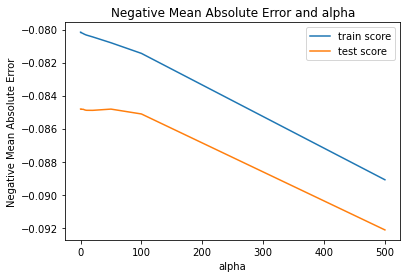

In [13906]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [13907]:

# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=50)

In [13908]:

# check the coefficient values with lambda = 50

alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.80978034e-02,  7.53646095e-02,  4.48028047e-02,  4.66998474e-02,
        9.43520065e-03, -2.64664665e-03,  5.16144019e-02,  3.59667586e-02,
        4.59814050e-02, -3.03591935e-03,  6.73518346e-02, -1.62559303e-02,
        2.31985077e-02,  1.78431980e-02,  1.70096372e-02, -2.70936763e-02,
        2.64068004e-02,  2.00535736e-02,  3.13412224e-02,  3.02085364e-02,
        8.69975902e-03,  4.54966595e-02,  1.12535614e-02,  2.13184491e-02,
       -4.54660438e-32, -4.54660438e-32,  1.04073407e-02, -1.32860137e-02,
        1.36584875e-02,  3.58166273e-02,  2.54506847e-02, -2.16078318e-03,
        1.79196804e-03,  3.29689061e-04, -6.06264699e-03, -1.38488800e-03,
        3.67781974e-03, -3.05468273e-03, -2.01774014e-02, -4.60455038e-03,
       -2.90374487e-03,  3.26197801e-03, -4.60455038e-03, -1.56396545e-03,
        4.87722257e-04, -1.27081422e-02,  2.87851760e-03, -4.60455038e-03,
        3.15290674e-03,  6.19878217e-03])

In [13909]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9090214796338847
0.8942986596420384
12.160253741358893
5.999833426588248
0.012800267096167257
0.014705474084775117


In [13910]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0                       LotArea       0.0281
1                   OverallQual       0.0754
2                   OverallCond       0.0448
3                    BsmtFinSF1       0.0467
4                    BsmtFinSF2       0.0094
5                     BsmtUnfSF      -0.0026
6                   TotalBsmtSF       0.0516
7                      1stFlrSF       0.0360
8                      2ndFlrSF       0.0460
9                  LowQualFinSF      -0.0030
10                    GrLivArea       0.0674
11                 KitchenAbvGr      -0.0163
12                   GarageCars       0.0232
13                   GarageArea       0.0178
14               GarageOldOrNew       0.0170
15                    house_age      -0.0271
16                   n_BsmtQual       0.0264
17                  n_HeatingQC       0.0201
18                n_FireplaceQu       0.0313
19                  MSZoning_FV       0.0302
20                  MSZoning_RH       0.0087
21                  MSZoning_RL       0.0455
22                  MSZoning_RM       0.0113
23              Condition1_Norm       0.0213
24              Condition2_RRAn      -0.0000
25               RoofMatl_Metal      -0.0000
26             RoofMatl_WdShngl       0.0104
27          Exterior1st_Wd Sdng      -0.0133
28            Foundation_CBlock       0.0137
29             Foundation_PConc       0.0358
30                BsmtCond_None       0.0255
31                  BsmtCond_Po      -0.0022
32                 Heating_GasA       0.0018
33                 Heating_GasW       0.0003
34                 Heating_Grav      -0.0061
35                 Heating_OthW      -0.0014
36                 Heating_Wall       0.0037
37               Electrical_Mix      -0.0031
38  Functional_other_Functional      -0.0202
39              GarageType_None      -0.0046
40                GarageQual_Fa      -0.0029
41                GarageQual_Gd       0.0033
42              GarageQual_None      -0.0046
43                GarageQual_Po      -0.0016
44                GarageQual_TA       0.0005
45                GarageCond_Fa      -0.0127
46                GarageCond_Gd       0.0029
47              GarageCond_None      -0.0046
48                GarageCond_Po       0.0032
49                GarageCond_TA       0.0062

In [13911]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0281,
 'OverallQual': 0.0754,
 'OverallCond': 0.0448,
 'BsmtFinSF1': 0.0467,
 'BsmtFinSF2': 0.0094,
 'BsmtUnfSF': -0.0026,
 'TotalBsmtSF': 0.0516,
 '1stFlrSF': 0.036,
 '2ndFlrSF': 0.046,
 'LowQualFinSF': -0.003,
 'GrLivArea': 0.0674,
 'KitchenAbvGr': -0.0163,
 'GarageCars': 0.0232,
 'GarageArea': 0.0178,
 'GarageOldOrNew': 0.017,
 'house_age': -0.0271,
 'n_BsmtQual': 0.0264,
 'n_HeatingQC': 0.0201,
 'n_FireplaceQu': 0.0313,
 'MSZoning_FV': 0.0302,
 'MSZoning_RH': 0.0087,
 'MSZoning_RL': 0.0455,
 'MSZoning_RM': 0.0113,
 'Condition1_Norm': 0.0213,
 'Condition2_RRAn': -0.0,
 'RoofMatl_Metal': -0.0,
 'RoofMatl_WdShngl': 0.0104,
 'Exterior1st_Wd Sdng': -0.0133,
 'Foundation_CBlock': 0.0137,
 'Foundation_PConc': 0.0358,
 'BsmtCond_None': 0.0255,
 'BsmtCond_Po': -0.0022,
 'Heating_GasA': 0.0018,
 'Heating_GasW': 0.0003,
 'Heating_Grav': -0.0061,
 'Heating_OthW': -0.0014,
 'Heating_Wall': 0.0037,
 'Electrical_Mix': -0.0031,
 'Functional_other_Functional': -0.0202,
 'GarageType_No

In [13912]:
#RFE

# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [13913]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

ridge_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
ridge_df = ridge_df.loc[ridge_df['rfe_support'] == True]
ridge_df.reset_index(drop=True, inplace=True)

ridge_df['Coefficient'] = ridge_df['Features'].apply(find)
ridge_df = ridge_df.sort_values(by=['Coefficient'], ascending=False)
ridge_df = ridge_df.head(10)
ridge_df

Features  rfe_support  rfe_ranking  Coefficient
0     OverallQual         True            1       0.0754
6       GrLivArea         True            1       0.0674
2     TotalBsmtSF         True            1       0.0516
1      BsmtFinSF1         True            1       0.0467
4        2ndFlrSF         True            1       0.0460
3        1stFlrSF         True            1       0.0360
7    Heating_GasA         True            1       0.0018
12  GarageQual_Po         True            1      -0.0016
10  GarageQual_Fa         True            1      -0.0029
5    LowQualFinSF         True            1      -0.0030

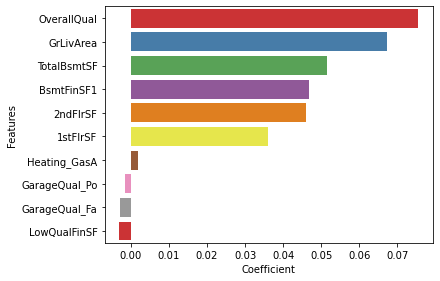

In [13914]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = ridge_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

##### Lasso

In [13915]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [13916]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.080218        -0.084840                1
1       0.0002         -0.080260        -0.084850                2
2       0.0003         -0.080301        -0.084875                3
3       0.0004         -0.080347        -0.084962                4
4       0.0005         -0.080397        -0.085054                5
5        0.001         -0.080669        -0.085236                6
6        0.002         -0.081461        -0.085568                7
7        0.003         -0.082089        -0.086212                8
8        0.004         -0.082763        -0.086797                9
9        0.005         -0.083431        -0.087287               10
10        0.01         -0.086555        -0.089532               11

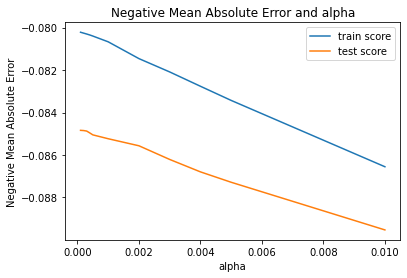

In [13917]:

# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [13918]:

# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [13919]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 2.93312465e-02,  7.49758223e-02,  4.82313958e-02,  4.95002605e-02,
        1.01338154e-02, -0.00000000e+00,  5.80451187e-02,  2.99619457e-02,
        4.65154239e-02, -2.04227663e-03,  7.23812588e-02, -1.90248727e-02,
        2.23444964e-02,  1.83879753e-02,  1.81647325e-02, -2.29899475e-02,
        2.87769235e-02,  1.93076506e-02,  2.95153011e-02,  7.32264867e-02,
        3.09163037e-02,  1.28087303e-01,  8.57709440e-02,  2.15984444e-02,
       -0.00000000e+00, -0.00000000e+00,  9.75432675e-03, -1.28399771e-02,
        2.10918101e-02,  4.21360335e-02,  3.41521712e-02, -0.00000000e+00,
        1.49810335e-03, -0.00000000e+00, -6.23751591e-03, -1.78975142e-03,
        3.65810907e-03, -3.99350900e-03, -2.14068756e-02, -1.82722250e-02,
       -2.69476338e-03,  3.65049487e-03, -6.18651562e-05, -1.90947761e-03,
        0.00000000e+00, -1.46421266e-02,  1.07827992e-03, -5.82232865e-04,
        2.10634677e-03,  0.00000000e+00])

In [13920]:
# Lets calculate some metrics such as R2 score, RSS and RMSE


y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9119587677725383
0.8988147542979065
11.767653719576012
5.743490265922991
0.012387003915343172
0.014077182024321056


In [13921]:
#Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0                       LotArea       0.0293
1                   OverallQual       0.0750
2                   OverallCond       0.0482
3                    BsmtFinSF1       0.0495
4                    BsmtFinSF2       0.0101
5                   TotalBsmtSF       0.0580
6                      1stFlrSF       0.0300
7                      2ndFlrSF       0.0465
8                  LowQualFinSF      -0.0020
9                     GrLivArea       0.0724
10                 KitchenAbvGr      -0.0190
11                   GarageCars       0.0223
12                   GarageArea       0.0184
13               GarageOldOrNew       0.0182
14                    house_age      -0.0230
15                   n_BsmtQual       0.0288
16                  n_HeatingQC       0.0193
17                n_FireplaceQu       0.0295
18                  MSZoning_FV       0.0732
19                  MSZoning_RH       0.0309
20                  MSZoning_RL       0.1281
21                  MSZoning_RM       0.0858
22              Condition1_Norm       0.0216
23             RoofMatl_WdShngl       0.0098
24          Exterior1st_Wd Sdng      -0.0128
25            Foundation_CBlock       0.0211
26             Foundation_PConc       0.0421
27                BsmtCond_None       0.0342
28                 Heating_GasA       0.0015
29                 Heating_Grav      -0.0062
30                 Heating_OthW      -0.0018
31                 Heating_Wall       0.0037
32               Electrical_Mix      -0.0040
33  Functional_other_Functional      -0.0214
34              GarageType_None      -0.0183
35                GarageQual_Fa      -0.0027
36                GarageQual_Gd       0.0037
37              GarageQual_None      -0.0001
38                GarageQual_Po      -0.0019
39                GarageCond_Fa      -0.0146
40                GarageCond_Gd       0.0011
41              GarageCond_None      -0.0006
42                GarageCond_Po       0.0021

In [13922]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.029331246530482233,
 'OverallQual': 0.07497582226304336,
 'OverallCond': 0.04823139578253782,
 'BsmtFinSF1': 0.049500260493116566,
 'BsmtFinSF2': 0.01013381540484891,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.05804511866745313,
 '1stFlrSF': 0.02996194572510324,
 '2ndFlrSF': 0.04651542392252998,
 'LowQualFinSF': -0.002042276626756735,
 'GrLivArea': 0.07238125875499339,
 'KitchenAbvGr': -0.01902487270208896,
 'GarageCars': 0.022344496412482744,
 'GarageArea': 0.018387975295621205,
 'GarageOldOrNew': 0.018164732521833635,
 'house_age': -0.022989947532373704,
 'n_BsmtQual': 0.028776923466364256,
 'n_HeatingQC': 0.019307650584933833,
 'n_FireplaceQu': 0.02951530113888032,
 'MSZoning_FV': 0.07322648673836563,
 'MSZoning_RH': 0.030916303675287988,
 'MSZoning_RL': 0.12808730312661062,
 'MSZoning_RM': 0.08577094400269034,
 'Condition1_Norm': 0.021598444396754575,
 'Condition2_RRAn': -0.0,
 'RoofMatl_Metal': -0.0,
 'RoofMatl_WdShngl': 0.00975432674955139,
 'Exterior1st_Wd Sdng': -0.012

In [13923]:
#RFE
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [13924]:

# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

lasso_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_df = lasso_df.loc[lasso_df['rfe_support'] == True]
lasso_df.reset_index(drop=True, inplace=True)

lasso_df['Coefficient'] = lasso_df['Features'].apply(find)
lasso_df = lasso_df.sort_values(by=['Coefficient'], ascending=False)
lasso_df = lasso_df.head(10)
lasso_df

Features  rfe_support  rfe_ranking  Coefficient
11       MSZoning_RL         True            1     0.128087
12       MSZoning_RM         True            1     0.085771
0        OverallQual         True            1     0.074976
9        MSZoning_FV         True            1     0.073226
4          GrLivArea         True            1     0.072381
3        TotalBsmtSF         True            1     0.058045
2         BsmtFinSF1         True            1     0.049500
1        OverallCond         True            1     0.048231
13  Foundation_PConc         True            1     0.042136
14     BsmtCond_None         True            1     0.034152

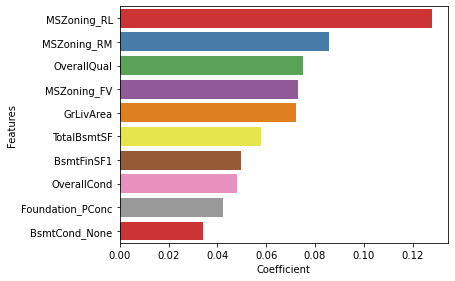

In [13925]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

### Step4 : Residual Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

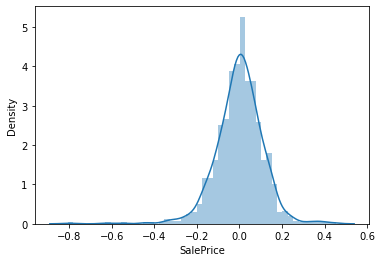

In [13926]:
#Residual error
res = y_train - y_pred_train
sns.distplot(res)

##### Assumption2 -We got the normal distribution of error terms with mean 0 which we have assumed. Therefore the residuals are following with mean 0

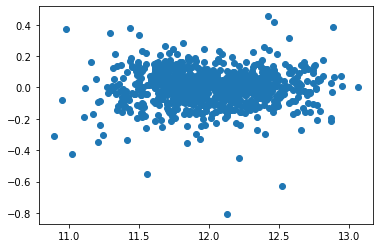

In [13927]:
# #look for patterns in residuals( we should not be able to identify the pattern)
plt.scatter(y_pred_train, res)
plt.show() 

#### Assumption 3- the residuals are scattered around the 0 on Y-axis and there is no identifiable patterns and clusters which indicates that residuals are normally distributed.

This signifies the model is fit

### Observations:

- The optimal lambda value for Ridge and lasso regression is shown below:
     - Ridge - 50
     - Lasso - 0.0001
     
 - Accuracy (R2-score) for Ridge and Lasso:
     - Lasso (Train - 0.9119587677725383, Test - 0.8988147542979065)
     - Ridge (Train - 0.9090214796338847, Test - 0.8942986596420384)
 
 - The Mean Squared error for Ridge and Lasso :
     - Ridge - 0.0147054
     - Lasso - 0.0140771
 
- The Mean Squared Error of Lasso is slightly lower than that of Ridge
- Also Lasso shrinks the coefficients of features to exactly 0.
- Top 5 predictors of Ridge regression affect the house price are:
     - OverallQual
     - GrLivArea
     - TotalBsmtSF
     - BsmtFinSF1
     - 2ndFlrSF
 
- Top 5 predictors of Lasso regression affect the house price are:
     - MSZoning_RL
     - MSZoning_RM
     - OverallQual
     - MSZoning_FV
     - GrLivArea
     

     

#### If we choose the double the valud of alpha for both Ridge and Lasso

In [13928]:
# check the coefficient values with lambda = 0.0001

alpha1 = (0.0001*2)

lasso1 = Lasso(alpha=alpha1)
        
lasso1.fit(X_train, y_train) 
lasso1.coef_

array([ 2.91154012e-02,  7.55114736e-02,  4.81092779e-02,  4.95176512e-02,
        1.00668779e-02, -0.00000000e+00,  5.74507333e-02,  0.00000000e+00,
        8.77253268e-03, -6.41213278e-03,  1.13863986e-01, -1.87416853e-02,
        2.24730581e-02,  1.81847576e-02,  1.78246657e-02, -2.32658253e-02,
        2.83731921e-02,  1.92813122e-02,  2.95373370e-02,  6.99413394e-02,
        2.90882040e-02,  1.21732837e-01,  7.98672556e-02,  2.15356818e-02,
       -0.00000000e+00, -0.00000000e+00,  9.60507056e-03, -1.28527422e-02,
        2.05175810e-02,  4.18141408e-02,  3.34609445e-02, -0.00000000e+00,
        1.33796046e-03, -0.00000000e+00, -6.15245709e-03, -1.68159362e-03,
        3.49863992e-03, -3.99505819e-03, -2.12626799e-02, -1.80921358e-02,
       -2.55853955e-03,  3.50928243e-03, -5.78519284e-05, -1.61902029e-03,
        0.00000000e+00, -1.47518206e-02,  1.02509065e-03, -5.84315635e-04,
        1.76268919e-03,  0.00000000e+00])

In [13929]:
# Lets calculate some metrics such as R2 score, RSS and RMSE


y_pred_train = lasso1.predict(X_train)
y_pred_test = lasso1.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9119112110449746
0.8987128211216182
11.774010185607283
5.749276210323521
0.012393694932218192
0.014091363260596866


In [13930]:
#Put the shortlisted Features and coefficienst in a dataframe

lasso_df1 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df1 = lasso_df1[lasso_df1['Coefficient'] != 0.00]
lasso_df1.reset_index(drop=True, inplace=True)
lasso_df1

Features  Coefficient
0                       LotArea       0.0293
1                   OverallQual       0.0750
2                   OverallCond       0.0482
3                    BsmtFinSF1       0.0495
4                    BsmtFinSF2       0.0101
5                   TotalBsmtSF       0.0580
6                      1stFlrSF       0.0300
7                      2ndFlrSF       0.0465
8                  LowQualFinSF      -0.0020
9                     GrLivArea       0.0724
10                 KitchenAbvGr      -0.0190
11                   GarageCars       0.0223
12                   GarageArea       0.0184
13               GarageOldOrNew       0.0182
14                    house_age      -0.0230
15                   n_BsmtQual       0.0288
16                  n_HeatingQC       0.0193
17                n_FireplaceQu       0.0295
18                  MSZoning_FV       0.0732
19                  MSZoning_RH       0.0309
20                  MSZoning_RL       0.1281
21                  MSZoning_RM       0.0858
22              Condition1_Norm       0.0216
23             RoofMatl_WdShngl       0.0098
24          Exterior1st_Wd Sdng      -0.0128
25            Foundation_CBlock       0.0211
26             Foundation_PConc       0.0421
27                BsmtCond_None       0.0342
28                 Heating_GasA       0.0015
29                 Heating_Grav      -0.0062
30                 Heating_OthW      -0.0018
31                 Heating_Wall       0.0037
32               Electrical_Mix      -0.0040
33  Functional_other_Functional      -0.0214
34              GarageType_None      -0.0183
35                GarageQual_Fa      -0.0027
36                GarageQual_Gd       0.0037
37              GarageQual_None      -0.0001
38                GarageQual_Po      -0.0019
39                GarageCond_Fa      -0.0146
40                GarageCond_Gd       0.0011
41              GarageCond_None      -0.0006
42                GarageCond_Po       0.0021

In [13931]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict1 = dict(pd.Series(lasso1.coef_, index = X_train.columns))
lasso_coeff_dict1

{'LotArea': 0.029115401176250187,
 'OverallQual': 0.07551147360616474,
 'OverallCond': 0.04810927793320033,
 'BsmtFinSF1': 0.049517651186903835,
 'BsmtFinSF2': 0.010066877851399337,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.057450733319753644,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.008772532684506224,
 'LowQualFinSF': -0.006412132775365582,
 'GrLivArea': 0.11386398584859263,
 'KitchenAbvGr': -0.018741685318283283,
 'GarageCars': 0.0224730580880516,
 'GarageArea': 0.018184757562864685,
 'GarageOldOrNew': 0.01782466574385172,
 'house_age': -0.023265825333789465,
 'n_BsmtQual': 0.028373192073385883,
 'n_HeatingQC': 0.019281312239516693,
 'n_FireplaceQu': 0.02953733700798047,
 'MSZoning_FV': 0.06994133943897217,
 'MSZoning_RH': 0.029088204038939233,
 'MSZoning_RL': 0.12173283675647942,
 'MSZoning_RM': 0.07986725555537,
 'Condition1_Norm': 0.021535681790788963,
 'Condition2_RRAn': -0.0,
 'RoofMatl_Metal': -0.0,
 'RoofMatl_WdShngl': 0.009605070557722256,
 'Exterior1st_Wd Sdng': -0.012852742158496688,


In [13932]:
#RFE
# Do an RFE to minimise the features to 15

X_train_lasso1 = X_train[lasso_df1.Features]

lm = LinearRegression()
lm.fit(X_train_lasso1, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso1, y_train)

In [13933]:
# Assign top 10 features to a temp dataframe for further display in the bar plot

lasso_df1 = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_df1 = lasso_df1.loc[lasso_df1['rfe_support'] == True]
lasso_df1.reset_index(drop=True, inplace=True)

lasso_df1['Coefficient'] = lasso_df1['Features'].apply(find)
lasso_df1 = lasso_df1.sort_values(by=['Coefficient'], ascending=False)
lasso_df1 = lasso_df1.head(10)
lasso_df1

Features  rfe_support  rfe_ranking  Coefficient
11       MSZoning_RL         True            1     0.128087
12       MSZoning_RM         True            1     0.085771
0        OverallQual         True            1     0.074976
9        MSZoning_FV         True            1     0.073226
4          GrLivArea         True            1     0.072381
3        TotalBsmtSF         True            1     0.058045
2         BsmtFinSF1         True            1     0.049500
1        OverallCond         True            1     0.048231
13  Foundation_PConc         True            1     0.042136
14     BsmtCond_None         True            1     0.034152

In [13934]:
# Doubling the value of alpha for Ridge

# check the coefficient values with lambda = 50

alpha2 = (50*2)
ridge1 = Ridge(alpha=alpha2)

ridge1.fit(X_train, y_train)
ridge1.coef_

array([ 2.76231488e-02,  7.29552849e-02,  4.12164753e-02,  4.43013531e-02,
        8.54971979e-03, -3.86776824e-03,  4.72567915e-02,  3.75268006e-02,
        4.32393298e-02, -2.85597900e-03,  6.60370735e-02, -1.48577440e-02,
        2.34592352e-02,  1.93413709e-02,  1.60480647e-02, -2.89103139e-02,
        2.59337418e-02,  2.04997031e-02,  3.21747411e-02,  2.26672739e-02,
        4.69788347e-03,  3.23033071e-02, -1.25305797e-03,  2.05695992e-02,
       -2.27301165e-32, -2.27301165e-32,  1.03606798e-02, -1.34061894e-02,
        8.53307217e-03,  3.15021891e-02,  1.96599290e-02, -2.40506408e-03,
        1.94592281e-03,  2.26263781e-04, -6.12048247e-03, -1.20645720e-03,
        3.41705655e-03, -3.40002078e-03, -1.94746436e-02, -4.07416386e-03,
       -3.19550394e-03,  3.46629795e-03, -4.07416386e-03, -1.15666197e-03,
        1.50595168e-03, -1.24211792e-02,  2.85682654e-03, -4.07416386e-03,
        2.95716609e-03,  7.09789802e-03])

In [13935]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge1.predict(X_train)
y_pred_test = ridge1.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9069671867004614
0.8931810426954747
12.434831995973065
6.063271747156419
0.013089296837866384
0.014860960164599066


In [13936]:
# Put the Features and coefficienst in a dataframe

ridge_df1 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge1.coef_.round(4)})
ridge_df1.reset_index(drop=True, inplace=True)
ridge_df1

Features  Coefficient
0                       LotArea       0.0276
1                   OverallQual       0.0730
2                   OverallCond       0.0412
3                    BsmtFinSF1       0.0443
4                    BsmtFinSF2       0.0085
5                     BsmtUnfSF      -0.0039
6                   TotalBsmtSF       0.0473
7                      1stFlrSF       0.0375
8                      2ndFlrSF       0.0432
9                  LowQualFinSF      -0.0029
10                    GrLivArea       0.0660
11                 KitchenAbvGr      -0.0149
12                   GarageCars       0.0235
13                   GarageArea       0.0193
14               GarageOldOrNew       0.0160
15                    house_age      -0.0289
16                   n_BsmtQual       0.0259
17                  n_HeatingQC       0.0205
18                n_FireplaceQu       0.0322
19                  MSZoning_FV       0.0227
20                  MSZoning_RH       0.0047
21                  MSZoning_RL       0.0323
22                  MSZoning_RM      -0.0013
23              Condition1_Norm       0.0206
24              Condition2_RRAn      -0.0000
25               RoofMatl_Metal      -0.0000
26             RoofMatl_WdShngl       0.0104
27          Exterior1st_Wd Sdng      -0.0134
28            Foundation_CBlock       0.0085
29             Foundation_PConc       0.0315
30                BsmtCond_None       0.0197
31                  BsmtCond_Po      -0.0024
32                 Heating_GasA       0.0019
33                 Heating_GasW       0.0002
34                 Heating_Grav      -0.0061
35                 Heating_OthW      -0.0012
36                 Heating_Wall       0.0034
37               Electrical_Mix      -0.0034
38  Functional_other_Functional      -0.0195
39              GarageType_None      -0.0041
40                GarageQual_Fa      -0.0032
41                GarageQual_Gd       0.0035
42              GarageQual_None      -0.0041
43                GarageQual_Po      -0.0012
44                GarageQual_TA       0.0015
45                GarageCond_Fa      -0.0124
46                GarageCond_Gd       0.0029
47              GarageCond_None      -0.0041
48                GarageCond_Po       0.0030
49                GarageCond_TA       0.0071

In [13937]:
#RFE

# Do an RFE to minimise the features to 15
X_train_ridge1 = X_train[ridge_df1.Features]

lm = LinearRegression()
lm.fit(X_train_ridge1, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge1, y_train)

In [13938]:
# Assign top 10 features to a temp dataframe for further display in the bar plot

ridge_df1 = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
ridge_df1 = ridge_df1.loc[ridge_df1['rfe_support'] == True]
ridge_df1.reset_index(drop=True, inplace=True)

ridge_df1['Coefficient'] = ridge_df1['Features'].apply(find)
ridge_df1 = ridge_df1.sort_values(by=['Coefficient'], ascending=False)
ridge_df1 = ridge_df1.head(10)
ridge_df1

Features  rfe_support  rfe_ranking  Coefficient
0       OverallQual         True            1     0.074976
6         GrLivArea         True            1     0.072381
2       TotalBsmtSF         True            1     0.058045
1        BsmtFinSF1         True            1     0.049500
4          2ndFlrSF         True            1     0.046515
3          1stFlrSF         True            1     0.029962
7      Heating_GasA         True            1     0.001498
11  GarageQual_None         True            1    -0.000062
14  GarageCond_None         True            1    -0.000582
12    GarageQual_Po         True            1    -0.001909

In [13939]:
# Rebuilding Lasso model again after removing top 5 predictors .
X_train = X_train.drop(['MSZoning_RL','MSZoning_RM','OverallQual','MSZoning_FV','GrLivArea'], axis =1 )
X_test = X_test.drop(['MSZoning_RL','MSZoning_RM','OverallQual','MSZoning_FV','GrLivArea'], axis =1 )

lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [13940]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
5        0.001         -0.090221        -0.095187                1
4       0.0005         -0.090169        -0.095211                2
3       0.0004         -0.090167        -0.095226                3
2       0.0003         -0.090167        -0.095248                4
1       0.0002         -0.090171        -0.095273                5
0       0.0001         -0.090179        -0.095306                6
6        0.002         -0.090511        -0.095402                7
7        0.003         -0.090952        -0.095831                8
8        0.004         -0.091572        -0.096238                9
9        0.005         -0.092304        -0.096811               10
10        0.01         -0.096646        -0.100247               11

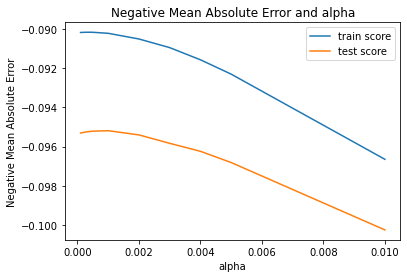

In [13941]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [13942]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [13943]:
# check the coefficient values with lambda = 0.0001

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 3.09806377e-02,  5.08718695e-02,  5.38682483e-02,  1.16909207e-02,
       -0.00000000e+00,  7.31388394e-02,  9.72953544e-02,  1.33480622e-01,
        0.00000000e+00, -2.66822550e-02,  3.04892498e-02,  1.58170569e-02,
        3.05149689e-02, -3.13796115e-02,  4.83711279e-02,  2.23344273e-02,
        3.88711450e-02,  4.22823105e-04,  2.27786083e-02, -0.00000000e+00,
       -0.00000000e+00,  1.39798551e-02, -1.09049888e-02,  2.30156563e-02,
        5.20629159e-02,  4.84354537e-02, -0.00000000e+00,  4.38225596e-03,
       -0.00000000e+00, -3.36892539e-04, -1.07048931e-03,  4.17830028e-03,
       -2.84557294e-03, -2.76253034e-02, -2.57408737e-02, -2.88971646e-03,
        6.26375148e-03, -1.83075501e-05, -0.00000000e+00,  1.11338324e-03,
       -1.83644600e-02,  4.45475499e-04, -0.00000000e+00,  0.00000000e+00,
        2.54912873e-03])

In [13944]:
X_train.shape

(950, 45)

In [13945]:
X_test.shape

(408, 45)

In [13946]:
# Lets calculate some metrics such as R2 score, RSS and RMSE


y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8895046147754857
0.8585734318115714
14.768891779863802
8.02767352193451
0.015546201873540845
0.01967567039689831


In [13947]:
#Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0                       LotArea       0.0310
1                   OverallCond       0.0509
2                    BsmtFinSF1       0.0539
3                    BsmtFinSF2       0.0117
4                   TotalBsmtSF       0.0731
5                      1stFlrSF       0.0973
6                      2ndFlrSF       0.1335
7                  KitchenAbvGr      -0.0267
8                    GarageCars       0.0305
9                    GarageArea       0.0158
10               GarageOldOrNew       0.0305
11                    house_age      -0.0314
12                   n_BsmtQual       0.0484
13                  n_HeatingQC       0.0223
14                n_FireplaceQu       0.0389
15                  MSZoning_RH       0.0004
16              Condition1_Norm       0.0228
17             RoofMatl_WdShngl       0.0140
18          Exterior1st_Wd Sdng      -0.0109
19            Foundation_CBlock       0.0230
20             Foundation_PConc       0.0521
21                BsmtCond_None       0.0484
22                 Heating_GasA       0.0044
23                 Heating_Grav      -0.0003
24                 Heating_OthW      -0.0011
25                 Heating_Wall       0.0042
26               Electrical_Mix      -0.0028
27  Functional_other_Functional      -0.0276
28              GarageType_None      -0.0257
29                GarageQual_Fa      -0.0029
30                GarageQual_Gd       0.0063
31                GarageQual_TA       0.0011
32                GarageCond_Fa      -0.0184
33                GarageCond_Gd       0.0004
34                GarageCond_TA       0.0025

In [13948]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.030980637676575107,
 'OverallCond': 0.05087186950962335,
 'BsmtFinSF1': 0.053868248270862285,
 'BsmtFinSF2': 0.011690920660565042,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.07313883943237975,
 '1stFlrSF': 0.09729535440329798,
 '2ndFlrSF': 0.13348062159954927,
 'LowQualFinSF': 0.0,
 'KitchenAbvGr': -0.026682255035659234,
 'GarageCars': 0.03048924982389805,
 'GarageArea': 0.015817056873703727,
 'GarageOldOrNew': 0.03051496885095473,
 'house_age': -0.03137961147883609,
 'n_BsmtQual': 0.04837112787075784,
 'n_HeatingQC': 0.022334427300378355,
 'n_FireplaceQu': 0.03887114502114241,
 'MSZoning_RH': 0.0004228231053714086,
 'Condition1_Norm': 0.02277860832085247,
 'Condition2_RRAn': -0.0,
 'RoofMatl_Metal': -0.0,
 'RoofMatl_WdShngl': 0.013979855081775754,
 'Exterior1st_Wd Sdng': -0.010904988752440259,
 'Foundation_CBlock': 0.023015656321413634,
 'Foundation_PConc': 0.05206291587553189,
 'BsmtCond_None': 0.04843545366962528,
 'BsmtCond_Po': -0.0,
 'Heating_GasA': 0.004382255960223522,

In [13949]:
#RFE
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [13950]:
lasso_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_df = lasso_df.loc[lasso_df['rfe_support'] == True]
lasso_df.reset_index(drop=True, inplace=True)

lasso_df['Coefficient'] = lasso_df['Features'].apply(find)
lasso_df = lasso_df.sort_values(by=['Coefficient'], ascending=False)
lasso_df = lasso_df.head(10)
lasso_df

Features  rfe_support  rfe_ranking  Coefficient
5           2ndFlrSF         True            1     0.133481
4           1stFlrSF         True            1     0.097295
3        TotalBsmtSF         True            1     0.073139
2         BsmtFinSF1         True            1     0.053868
12  Foundation_PConc         True            1     0.052063
1        OverallCond         True            1     0.050872
13     BsmtCond_None         True            1     0.048435
9         n_BsmtQual         True            1     0.048371
10     n_FireplaceQu         True            1     0.038871
0            LotArea         True            1     0.030981

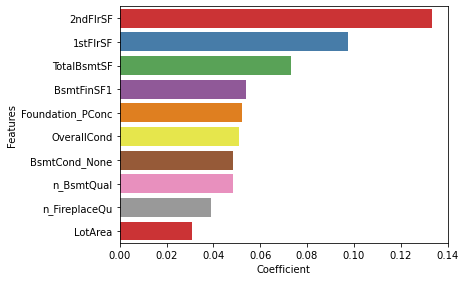

In [13951]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = lasso_df)
plt.show()